# Package import

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import random
import timeit
import sklearn
import sklearn.model_selection
import matplotlib.pyplot as plt
import matplotlib as mpl
import re
import string
from functools import reduce
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import SelectPercentile
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import resample
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
random.seed(9001) # For Reproducibility of Results
%matplotlib inline

pd.set_option('display.max_rows', 300)

# Data Load

In [9]:
#NOMIS - CENSUS DATA - DIMENSIONS
population = pd.read_csv('postcodeSector/populationCount.csv', skiprows=8) # 8039*8
ethnicMinority = pd.read_csv('postcodeSector/Ethnic.csv', skiprows=8)  # 8039*96
ageStructure = pd.read_csv('postcodeSector/ageStructure.csv', skiprows=8) #8039*20
relationalSituation = pd.read_csv('postcodeSector/relational.csv', skiprows=8) #8039*8
livingArrangements = pd.read_csv('postcodeSector/livingArrangements.csv', skiprows=8) #8039*9
householdComposition = pd.read_csv('postcodeSector/householdComposition.csv', skiprows=8) #8039*23
notInEmploymentDependencies = pd.read_csv('postcodeSector/notInEmploymentDependencies.csv', skiprows=8) #8039*10
loneParentDependencies = pd.read_csv('postcodeSector/loneParentDependencies.csv', skiprows=8)#8039*13
ethnicGroup = pd.read_csv('postcodeSector/ethnicGroup.csv', skiprows=8) #8039*25
industry = pd.read_csv('postcodeSector/industry.csv', skiprows=8)#8039*26
tenure = pd.read_csv('postcodeSector/tenure.csv', skiprows=8) #8039*8
hoursWorked = pd.read_csv('postcodeSector/hoursWorked.csv', skiprows=8) #8039*6
dwelling = pd.read_csv('postcodeSector/dwelling.csv', skiprows=8) #8039*5
englishProf = pd.read_csv('postcodeSector/englishProf.csv', skiprows=8) #8039*7
centralHeating = pd.read_csv('postcodeSector/centralHeating.csv', skiprows=8) #8039*9
passportHeld = pd.read_csv('postcodeSector/passportHeld.csv', skiprows=7) #8039*73
birthCountry = pd.read_csv('postcodeSector/birthCountry.csv', skiprows=8) #8039*9
religion = pd.read_csv('postcodeSector/religion.csv', skiprows=8) #8063*12
generalHealth = pd.read_csv('postcodeSector/generalHealth.csv', skiprows=8) #8039*7
yearLastWorked = pd.read_csv('postcodeSector/yearLastWorked.csv', skiprows=8) #8039*13
householdSize = pd.read_csv('postcodeSector/householdSize.csv', skiprows=8) #8039*10
carOrVanAvailability = pd.read_csv('postcodeSector/carOrVanAvailability.csv', skiprows=8) #8039*7
distanceTravelledtoWork = pd.read_csv('postcodeSector/distanceTravelledtoWork.csv', skiprows=8) #8039*14
methodofTraveltoWork = pd.read_csv('postcodeSector/methodofTraveltoWork.csv', skiprows=8) #8039*14
ageofArrival = pd.read_csv('postcodeSector/ageofArrival.csv', skiprows=8) #8039*19
lengthofResidence = pd.read_csv('postcodeSector/lengthofResidence.csv', skiprows=8) #8039*7
occupationType = pd.read_csv('postcodeSector/occupation.csv', skiprows=8) #8039*11
mainLanguage = pd.read_csv('postcodeSector/mainLanguage.csv', skiprows=8) #8039*105
bedrooms = pd.read_csv('postcodeSector/bedrooms.csv', skiprows=8) #8039*8
longTermDisability = pd.read_csv('postcodeSector/longTermDisability.csv', skiprows=8) #8039*5
economicActivity = pd.read_csv('postcodeSector/economicActivity.csv', skiprows=8) #8039*17
positionInCommunalEstablishment = pd.read_csv('postcodeSector/positionInCommunalEstablishment.csv', skiprows=8) #8039*5
accomType = pd.read_csv('postcodeSector/accomType.csv', skiprows=8) #8039*13
secondAddress = pd.read_csv('postcodeSector/secondAddress.csv', skiprows=8) #8039*6
formerIndustry = pd.read_csv('postcodeSector/formerIndustry.csv', skiprows=8) #8039*11
formerOccupation = pd.read_csv('postcodeSector/formerOccupation.csv', skiprows=8) #8039*12


religion = religion.drop(religion.index[-24:]) # line added due to notes at bottom of CSV

qualification = pd.read_csv('postcodeSector/qualification.csv', skiprows=8) #8039*14   # AS A PROPORTION ONLY 


In [10]:
qualification

postcode sector                                  No qualifications  \
0             AL1  1                                                9.4   
1             AL1  2                                               20.4   
2             AL1  3                                                8.8   
3             AL1  4                                                6.5   
4             AL1  5                                               15.4   
5             AL10 0                                               22.9   
6             AL10 8                                               18.9   
7             AL10 9                                                9.1   
8             AL2  1                                               16.7   
9             AL2  2                                               18.0   
10            AL2  3                                               16.9   
11            AL3  4                                                7.7   
12            AL3  5                                               12.9   
13            AL3  6                                               18.2   
14            AL3  7                                               17.2   
15            AL3  8                                               16.6   
16            AL4  0                                               12.4   
17            AL4  8                                               12.7   
18            AL4  9                                               13.2   
19            AL5  1                                               11.0   
20            AL5  2                                                7.5   
21            AL5  3                                                6.4   
22            AL5  4                                               11.1   
23            AL5  5                                               10.8   
24            AL6  0                                               10.9   
25            AL6  9                                               18.2   
26            AL7  1                                               20.4   
27            AL7  2                                               17.7   
28            AL7  3                                               22.8   
29            AL7  4                                               20.1   
30            AL8  6                                               15.6   
31            AL8  7                                               15.0   
32            AL9  5                                               12.3   
33            AL9  6                                               21.3   
34            AL9  7                                               17.6   
35            B1   1                                                6.5   
36            B1   2                                               16.1   
37            B1   3                                                3.8   
38            B10  0                                               38.7   
39            B10  9                                               38.7   
40            B11  1                                               40.0   
41            B11  2                                               34.5   
42            B11  3                                               33.9   
43            B11  4                                               35.2   
44            B12  0                                               27.2   
45            B12  8                                               36.6   
46            B12  9                                               34.5   
47            B13  0                                               29.3   
48            B13  8                                               16.2   
49            B13  9                                               21.2   
50            B14  4                                               31.1   
51            B14  5                                               36.9   
52            B14  6          

# Set up classification problem

In [11]:
qualification.drop(qualification.columns[[1,2,3,4,5,7,8,9,10,11,12]], axis=1, inplace=True)
qualification = qualification.rename(index=str, columns={"Highest level of qualification: Level 4 qualifications and above": "target"})

In [12]:
qualification.quantile(0.7) # Check to see where 70 percent quartile is to setup class imbalance

target    33.2
Name: 0.7, dtype: float64

In [22]:
# Assign a 1 or a zero as a output depending on whether proportion of people have, or don't have a higher education degree
qualification['classification'] = np.where(qualification['target']>=33.2, 1, 0) 

#Check
values = qualification.groupby('classification').count()
values['proportion']= values['target']/values['target'].sum()
values

postcode sector  target  proportion
classification                                     
0                          5620    5620     0.69944
1                          2415    2415     0.30056

Text(0,0.5,'Number of Instances')

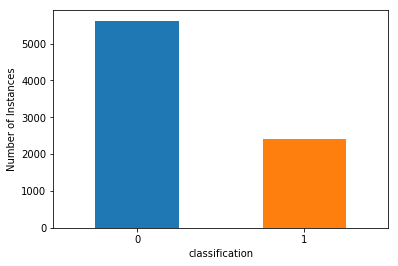

In [21]:
ax = values.plot.bar(y = 'instances',rot=0 )
ax.legend_.remove()
ax.set_ylabel('Number of Instances', fontdict=None, labelpad=None)

# Combine datasets

In [8]:
###Merge different datasets
newDF = [population, ethnicMinority, ageStructure, relationalSituation, livingArrangements, householdComposition,notInEmploymentDependencies,loneParentDependencies,ethnicGroup,industry,tenure, hoursWorked,dwelling,englishProf,centralHeating,passportHeld,birthCountry,religion,generalHealth,yearLastWorked,householdSize,carOrVanAvailability,distanceTravelledtoWork,methodofTraveltoWork,ageofArrival,lengthofResidence,occupationType,mainLanguage,bedrooms,longTermDisability,economicActivity,positionInCommunalEstablishment,accomType,secondAddress,formerIndustry,formerOccupation,qualification]
newDF2 = pd.concat([i.set_index('postcode sector') for i in newDF],axis=1, join='outer')

In [9]:
#Check for dimensions
newDF2.shape

(8039, 735)

In [10]:
#drop rows without any information
newDF3 = newDF2.dropna()
newDF3.shape

(8035, 735)

In [11]:
#drop duplicate columns arising from merging...
newDF4 = newDF3.T.drop_duplicates().T

In [12]:
#remove spaces from variable names to allow access to columns
newDF4.columns = newDF4.columns.map(lambda x: x.replace(' ', '_'))

# Splitting data into Train, Test and Validation

In [13]:
featuresforTraining = newDF4.drop(['target','classification'], axis=1)

In [14]:
#Define function for splitting data
def validationTrainTestSplit(featuresforTraining, newDF4):#Splits data into 60-20-20 spilt 
    X_train1, X_test, y_train1, y_test = train_test_split(featuresforTraining, newDF4.classification, random_state=0, test_size=.2)
    X_train, X_validation, y_train,y_validation = train_test_split(X_train1, y_train1, random_state=0, test_size=.25)
    
    return X_train, X_test, X_validation, y_train, y_validation,y_test

In [15]:
#Execute function for splitting data
X_train, X_test, X_validation, y_train, y_validation,y_test = validationTrainTestSplit(featuresforTraining,newDF4)

In [16]:
#Check to see if 60-20-20 split correct
print(X_train.shape)
print(X_test.shape)
print(X_validation.shape)

(4821, 704)
(1607, 704)
(1607, 704)


In [17]:
y_train=y_train.astype('int')
y_test = y_test.astype('int')
y_validation = y_validation.astype('int')

# KEEP ALL FEATURES

In [18]:
#Select 100% FOR ALL FEATURES
select = SelectPercentile(percentile = 100)
select.fit(X_train,y_train)
X_train_selected = select.transform(X_train)

In [19]:
#check to see if reduction is correctly executed
print("The shape of X_train is:  ",  X_train.shape)
print("The shape of X_train_selected is:  ",  X_train_selected.shape)

The shape of X_train is:   (4821, 704)
The shape of X_train_selected is:   (4821, 704)


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

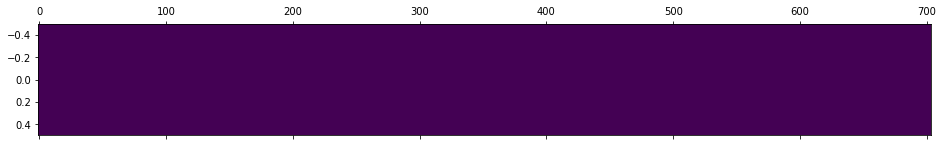

In [20]:
#Array creation of features selected, as well as graphical representation
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1,-1),aspect='auto')

In [21]:
#Apply feature reduction to Validation and test set
X_validation_selected = select.transform(X_validation)
X_test_selected = select.transform(X_test)

# Selected Features

In [22]:
selectedVariables = X_train.columns[select.get_support()]


In [23]:
for i in selectedVariables:
    print(i)

All_usual_residents
Males
Females
Lives_in_a_household
Lives_in_a_communal_establishment
Area_(Hectares)
Density_(number_of_persons_per_hectare)
English/Welsh/Scottish/Northern_Irish/British
Irish
Gypsy_or_Irish_Traveller
Other_White
White_and_Black_Caribbean
White_and_Black_African
White_and_Asian
Other_mixed
Indian_or_British_Indian
Pakistani_or_British_Pakistani
Bangladeshi,_British_Bangladeshi
Chinese
Other_Asian
African
Caribbean
Other_Black
Arab
Any_other_ethnic_group
Afghan
African/Arab
Albanian
Anglo_Indian
Argentinian
Australian/New_Zealander
Baltic_States
Black_and_Asian
Black_and_Chinese
Black_and_White
Black_British
Black_European
Black/African_American
Bosnian
Brazilian
British_Asian
Burmese
Cambodia
Caribbean_Asian
Chilean
Chinese_and_White
Colombian
Commonwealth_of_(Russian)_Independent_States
Croatian
Cuban
Cypriot
East_African_Asian
Ecuadorian
European_Mixed
Filipino
Greek
Greek_Cypriot
Indonesian
Iranian
Israeli
Italian
Japanese
Kashmiri
Korean
Kosovan
Kurdish
Latin/S

# Logistic Regression with Cross Validation

In [24]:
#Function for hyperparameter tuning
def hyperparameterTuneLogistic(i,j,X_train,y_train,X_test,y_test):
    print("        C =" + str(i) + "          Maximum Iterations =" + str(j))
#DEFINE MODEL
    logreg = LogisticRegression(C=i,max_iter=j,class_weight='balanced',random_state=123)
#TRAIN MODEL
    logreg.fit(X_train, y_train)
#Make Predictions
    y_pred = logreg.predict(X_test)
    
    
#PRINT METRICS
    print('CONFUSION MATRIX:   ')
    confusion_matrix2 = confusion_matrix(y_test, y_pred)
    print(confusion_matrix2)
    
    print('CLASSIFICATION REPORT:    ')
    print(classification_report(y_test, y_pred))

    print('ROC CURVE')
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    

    return

In [25]:
#HYPERPARAMETER TUNE
CValue = [0.001,0.0005,0.0001,0.01,0.5,0.1,0.5]
maxIterations = [50,100,150,200,250,300] 

        C =0.001          Maximum Iterations =50
CONFUSION MATRIX:   
[[1094   35]
 [  23  455]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.97      0.97      1129
          1       0.93      0.95      0.94       478

avg / total       0.96      0.96      0.96      1607

ROC CURVE


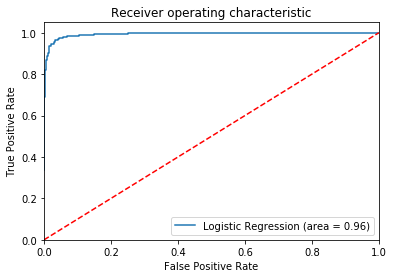

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.001          Maximum Iterations =100
CONFUSION MATRIX:   
[[1092   37]
 [  25  453]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.97      0.97      1129
          1       0.92      0.95      0.94       478

avg / total       0.96      0.96      0.96      1607

ROC CURVE


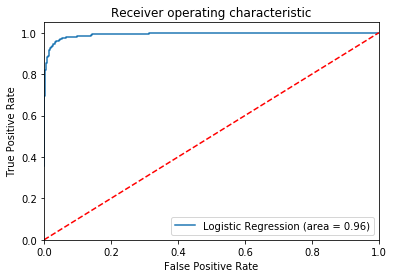

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.001          Maximum Iterations =150
CONFUSION MATRIX:   
[[1092   37]
 [  25  453]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.97      0.97      1129
          1       0.92      0.95      0.94       478

avg / total       0.96      0.96      0.96      1607

ROC CURVE


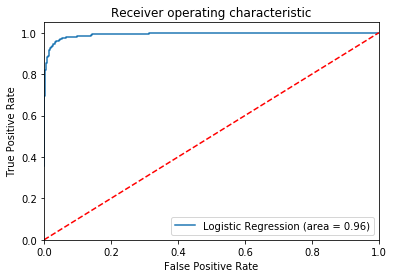

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.001          Maximum Iterations =200
CONFUSION MATRIX:   
[[1092   37]
 [  25  453]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.97      0.97      1129
          1       0.92      0.95      0.94       478

avg / total       0.96      0.96      0.96      1607

ROC CURVE


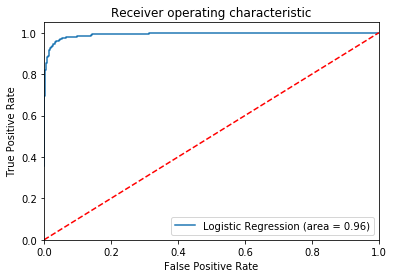

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.001          Maximum Iterations =250
CONFUSION MATRIX:   
[[1092   37]
 [  25  453]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.97      0.97      1129
          1       0.92      0.95      0.94       478

avg / total       0.96      0.96      0.96      1607

ROC CURVE


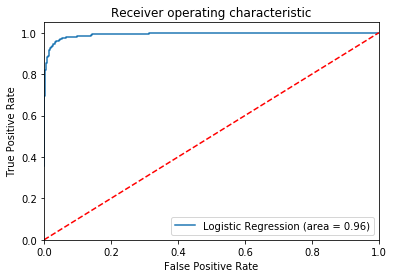

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.001          Maximum Iterations =300
CONFUSION MATRIX:   
[[1092   37]
 [  25  453]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.97      0.97      1129
          1       0.92      0.95      0.94       478

avg / total       0.96      0.96      0.96      1607

ROC CURVE


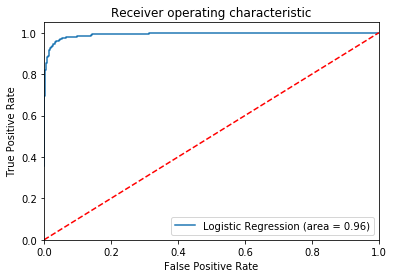

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0005          Maximum Iterations =50
CONFUSION MATRIX:   
[[1095   34]
 [  20  458]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.97      0.98      1129
          1       0.93      0.96      0.94       478

avg / total       0.97      0.97      0.97      1607

ROC CURVE


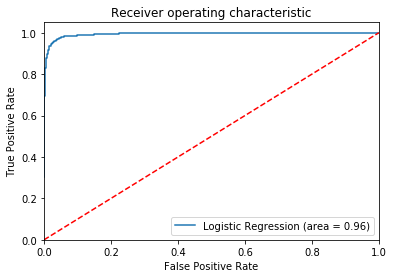

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0005          Maximum Iterations =100
CONFUSION MATRIX:   
[[1093   36]
 [  22  456]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.97      0.97      1129
          1       0.93      0.95      0.94       478

avg / total       0.96      0.96      0.96      1607

ROC CURVE


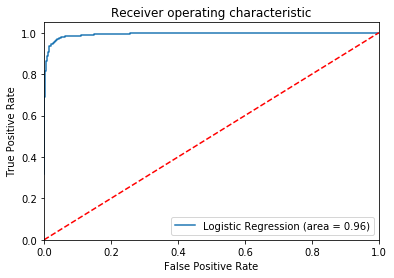

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0005          Maximum Iterations =150
CONFUSION MATRIX:   
[[1093   36]
 [  22  456]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.97      0.97      1129
          1       0.93      0.95      0.94       478

avg / total       0.96      0.96      0.96      1607

ROC CURVE


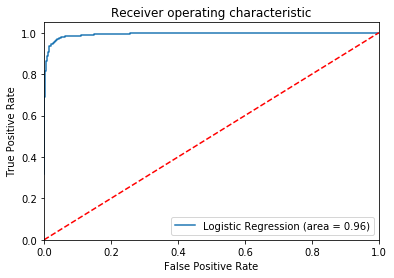

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0005          Maximum Iterations =200
CONFUSION MATRIX:   
[[1093   36]
 [  22  456]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.97      0.97      1129
          1       0.93      0.95      0.94       478

avg / total       0.96      0.96      0.96      1607

ROC CURVE


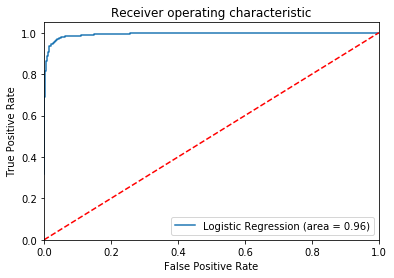

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0005          Maximum Iterations =250
CONFUSION MATRIX:   
[[1093   36]
 [  22  456]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.97      0.97      1129
          1       0.93      0.95      0.94       478

avg / total       0.96      0.96      0.96      1607

ROC CURVE


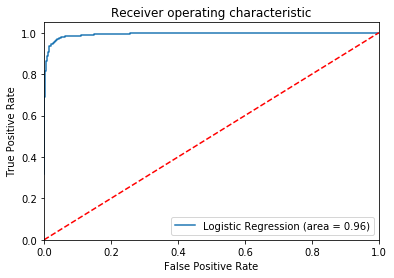

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0005          Maximum Iterations =300
CONFUSION MATRIX:   
[[1093   36]
 [  22  456]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.97      0.97      1129
          1       0.93      0.95      0.94       478

avg / total       0.96      0.96      0.96      1607

ROC CURVE


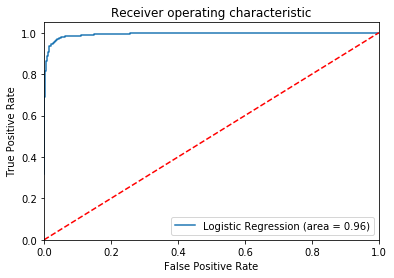

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0001          Maximum Iterations =50
CONFUSION MATRIX:   
[[1098   31]
 [  18  460]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.97      0.98      1129
          1       0.94      0.96      0.95       478

avg / total       0.97      0.97      0.97      1607

ROC CURVE


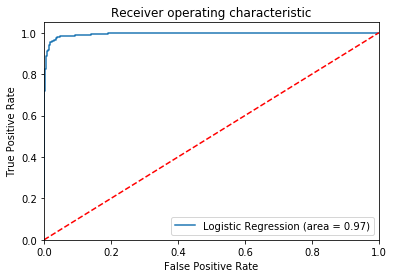

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0001          Maximum Iterations =100
CONFUSION MATRIX:   
[[1098   31]
 [  18  460]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.97      0.98      1129
          1       0.94      0.96      0.95       478

avg / total       0.97      0.97      0.97      1607

ROC CURVE


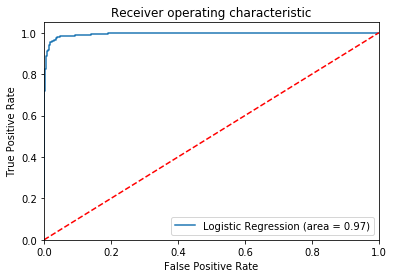

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0001          Maximum Iterations =150
CONFUSION MATRIX:   
[[1098   31]
 [  18  460]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.97      0.98      1129
          1       0.94      0.96      0.95       478

avg / total       0.97      0.97      0.97      1607

ROC CURVE


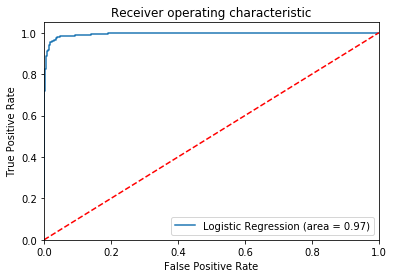

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0001          Maximum Iterations =200
CONFUSION MATRIX:   
[[1098   31]
 [  18  460]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.97      0.98      1129
          1       0.94      0.96      0.95       478

avg / total       0.97      0.97      0.97      1607

ROC CURVE


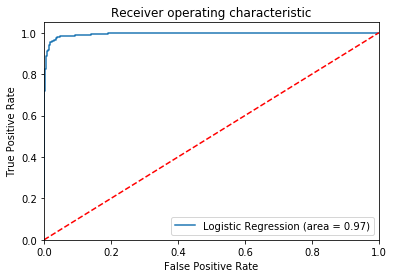

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0001          Maximum Iterations =250
CONFUSION MATRIX:   
[[1098   31]
 [  18  460]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.97      0.98      1129
          1       0.94      0.96      0.95       478

avg / total       0.97      0.97      0.97      1607

ROC CURVE


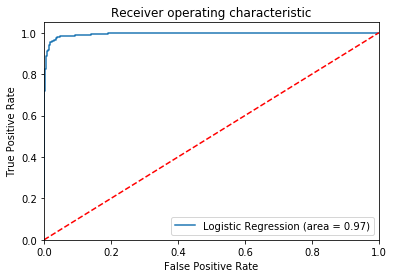

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.0001          Maximum Iterations =300
CONFUSION MATRIX:   
[[1098   31]
 [  18  460]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.97      0.98      1129
          1       0.94      0.96      0.95       478

avg / total       0.97      0.97      0.97      1607

ROC CURVE


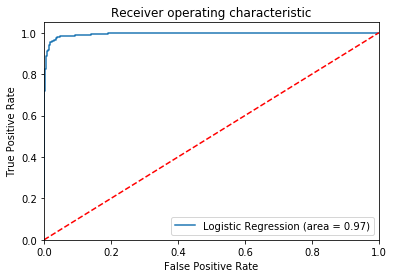

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.01          Maximum Iterations =50
CONFUSION MATRIX:   
[[1095   34]
 [  23  455]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.97      0.97      1129
          1       0.93      0.95      0.94       478

avg / total       0.96      0.96      0.96      1607

ROC CURVE


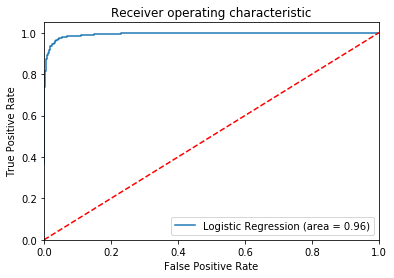

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.01          Maximum Iterations =100
CONFUSION MATRIX:   
[[1094   35]
 [  37  441]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.97      0.97      0.97      1129
          1       0.93      0.92      0.92       478

avg / total       0.96      0.96      0.96      1607

ROC CURVE


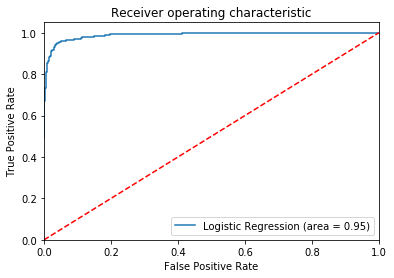

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.01          Maximum Iterations =150
CONFUSION MATRIX:   
[[1094   35]
 [  39  439]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.97      0.97      0.97      1129
          1       0.93      0.92      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


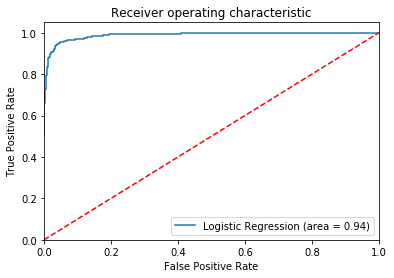

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.01          Maximum Iterations =200
CONFUSION MATRIX:   
[[1094   35]
 [  39  439]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.97      0.97      0.97      1129
          1       0.93      0.92      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


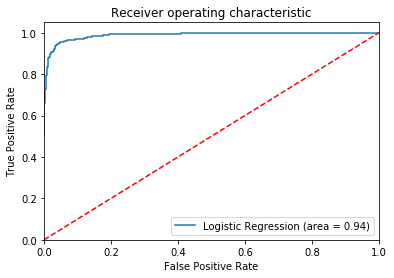

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.01          Maximum Iterations =250
CONFUSION MATRIX:   
[[1094   35]
 [  39  439]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.97      0.97      0.97      1129
          1       0.93      0.92      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


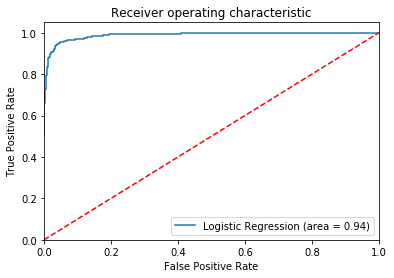

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.01          Maximum Iterations =300
CONFUSION MATRIX:   
[[1094   35]
 [  39  439]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.97      0.97      0.97      1129
          1       0.93      0.92      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


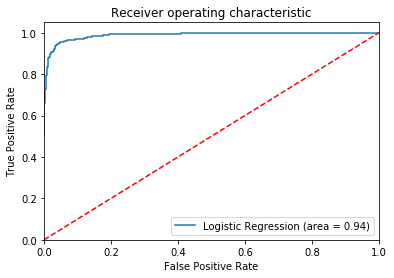

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =50
CONFUSION MATRIX:   
[[1096   33]
 [  16  462]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.99      0.97      0.98      1129
          1       0.93      0.97      0.95       478

avg / total       0.97      0.97      0.97      1607

ROC CURVE


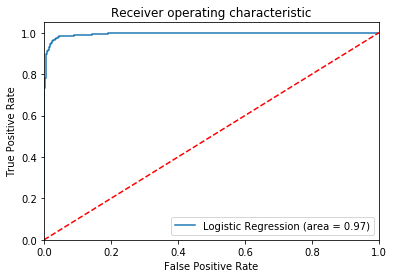

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =100
CONFUSION MATRIX:   
[[1094   35]
 [  23  455]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.97      0.97      1129
          1       0.93      0.95      0.94       478

avg / total       0.96      0.96      0.96      1607

ROC CURVE


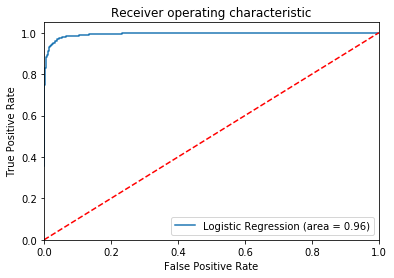

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =150
CONFUSION MATRIX:   
[[1094   35]
 [  28  450]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.97      0.97      1129
          1       0.93      0.94      0.93       478

avg / total       0.96      0.96      0.96      1607

ROC CURVE


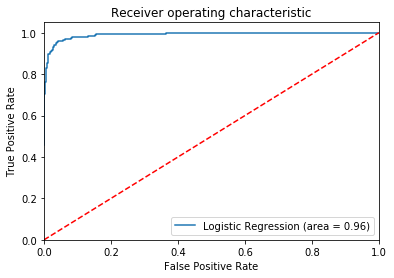

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =200
CONFUSION MATRIX:   
[[1090   39]
 [  39  439]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.97      0.97      0.97      1129
          1       0.92      0.92      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


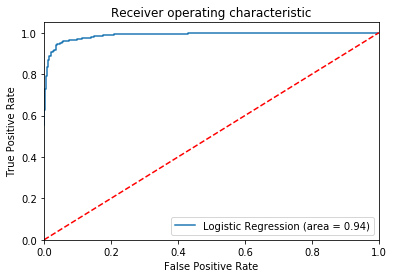

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =250
CONFUSION MATRIX:   
[[1090   39]
 [  41  437]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.96      0.97      0.96      1129
          1       0.92      0.91      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


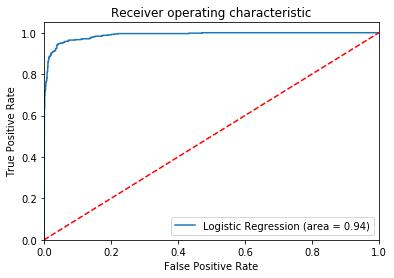

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =300
CONFUSION MATRIX:   
[[1090   39]
 [  41  437]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.96      0.97      0.96      1129
          1       0.92      0.91      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


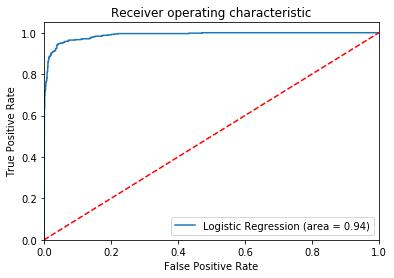

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.1          Maximum Iterations =50
CONFUSION MATRIX:   
[[1095   34]
 [  16  462]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.99      0.97      0.98      1129
          1       0.93      0.97      0.95       478

avg / total       0.97      0.97      0.97      1607

ROC CURVE


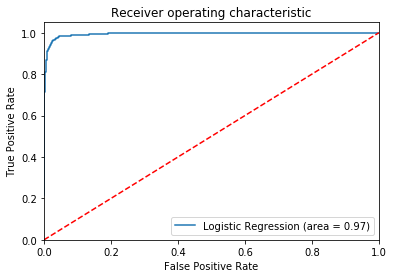

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.1          Maximum Iterations =100
CONFUSION MATRIX:   
[[1095   34]
 [  23  455]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.97      0.97      1129
          1       0.93      0.95      0.94       478

avg / total       0.96      0.96      0.96      1607

ROC CURVE


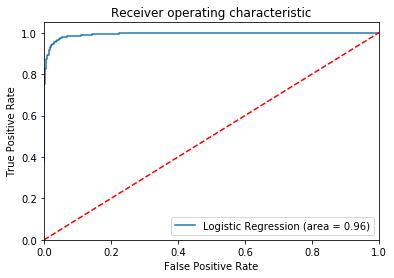

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.1          Maximum Iterations =150
CONFUSION MATRIX:   
[[1094   35]
 [  36  442]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.97      0.97      0.97      1129
          1       0.93      0.92      0.93       478

avg / total       0.96      0.96      0.96      1607

ROC CURVE


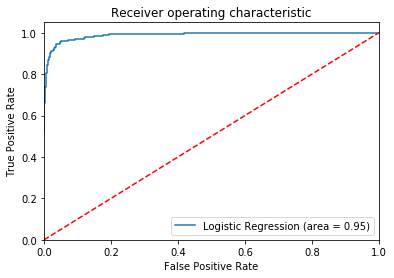

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.1          Maximum Iterations =200
CONFUSION MATRIX:   
[[1092   37]
 [  39  439]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.97      0.97      0.97      1129
          1       0.92      0.92      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


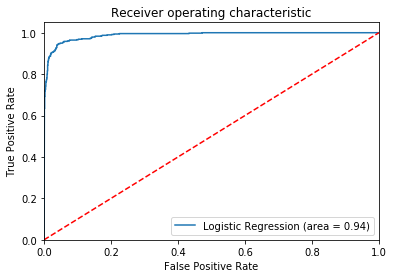

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.1          Maximum Iterations =250
CONFUSION MATRIX:   
[[1092   37]
 [  39  439]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.97      0.97      0.97      1129
          1       0.92      0.92      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


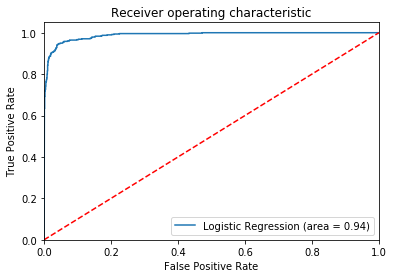

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.1          Maximum Iterations =300
CONFUSION MATRIX:   
[[1092   37]
 [  39  439]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.97      0.97      0.97      1129
          1       0.92      0.92      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


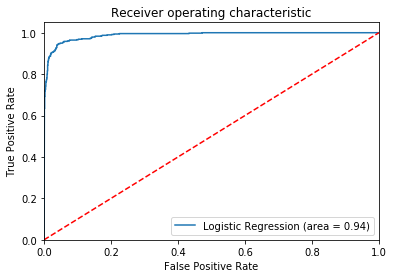

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =50
CONFUSION MATRIX:   
[[1096   33]
 [  16  462]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.99      0.97      0.98      1129
          1       0.93      0.97      0.95       478

avg / total       0.97      0.97      0.97      1607

ROC CURVE


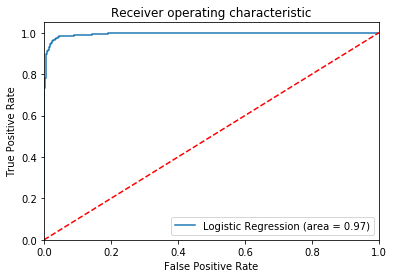

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =100
CONFUSION MATRIX:   
[[1094   35]
 [  23  455]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.97      0.97      1129
          1       0.93      0.95      0.94       478

avg / total       0.96      0.96      0.96      1607

ROC CURVE


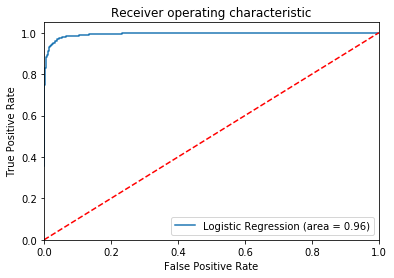

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =150
CONFUSION MATRIX:   
[[1094   35]
 [  28  450]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.98      0.97      0.97      1129
          1       0.93      0.94      0.93       478

avg / total       0.96      0.96      0.96      1607

ROC CURVE


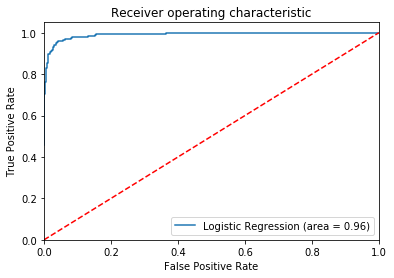

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =200
CONFUSION MATRIX:   
[[1090   39]
 [  39  439]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.97      0.97      0.97      1129
          1       0.92      0.92      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


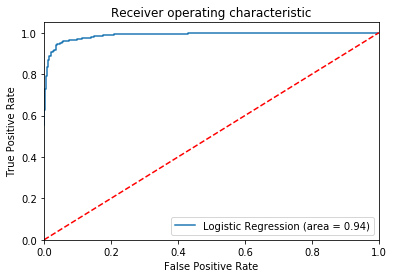

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =250
CONFUSION MATRIX:   
[[1090   39]
 [  41  437]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.96      0.97      0.96      1129
          1       0.92      0.91      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


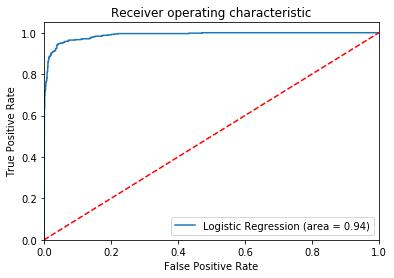

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
        C =0.5          Maximum Iterations =300
CONFUSION MATRIX:   
[[1090   39]
 [  41  437]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.96      0.97      0.96      1129
          1       0.92      0.91      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


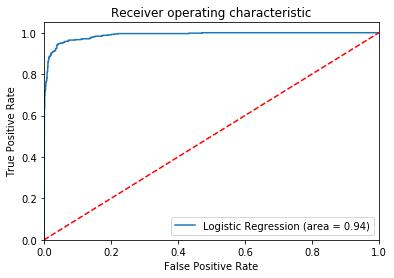

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
498.6275734972832


In [26]:
#RUN LOOP OF ALL PARAMETERS
start_time = timeit.default_timer()
for i in CValue:
    for j in maxIterations:
        hyperparameterTuneLogistic(i,j,X_train_selected, y_train, X_validation_selected, y_validation)
elapsed = timeit.default_timer() - start_time
print(elapsed)

### Logistic Regression

###### OPTIMAL PARAMETERS
###### C = 0.001    max_iter = 50
###### Execution time (498.628 seconds)


# Random Forest with Cross Validation

In [27]:
#HYPER PARAMETER TUNE
Estimators = [10,30,50,80,100,]
maxFeatures = ["auto","sqrt","log2", None ]
maxDepth = [1,10,50,100,150,None]

In [28]:
def hyperparameterTuneRandomForest(i,j,k,X_train,y_train,X_test,y_test):
    print("  Estimators =" + str(i) + "          Maximum Features =" + str(j) + "         Maximum Depth =" + str(k) )
# initiate model
    RandomForest = RandomForestClassifier(n_estimators=i, max_features = j, max_depth = k ,random_state=123, class_weight = 'balanced_subsample')

# train model
    RandomForest.fit(X_train, y_train)

#make predictions
    
    y_pred = RandomForest.predict(X_test)

#print metrics
    print('CONFUSION MATRIX:   ')
    confusion_matrix2 = confusion_matrix(y_test, y_pred)
    print(confusion_matrix2)
    
    print('CLASSIFICATION REPORT:    ')
    print(classification_report(y_test, y_pred))

    print('ROC CURVE')
    logit_roc_auc = roc_auc_score(y_test, RandomForest.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, RandomForest.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    return

  Estimators =10          Maximum Features =auto         Maximum Depth =1
CONFUSION MATRIX:   
[[788 341]
 [ 51 427]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.70      0.80      1129
          1       0.56      0.89      0.69       478

avg / total       0.83      0.76      0.77      1607

ROC CURVE


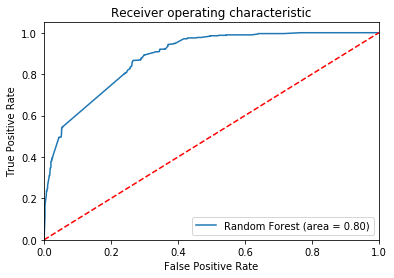

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =auto         Maximum Depth =10
CONFUSION MATRIX:   
[[1050   79]
 [  83  395]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.93      0.93      1129
          1       0.83      0.83      0.83       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


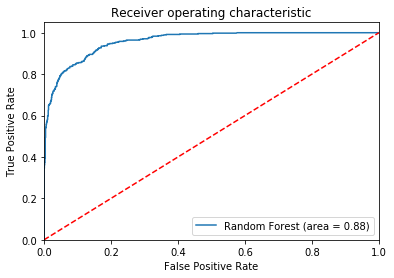

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =auto         Maximum Depth =50
CONFUSION MATRIX:   
[[1093   36]
 [ 113  365]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.97      0.94      1129
          1       0.91      0.76      0.83       478

avg / total       0.91      0.91      0.90      1607

ROC CURVE


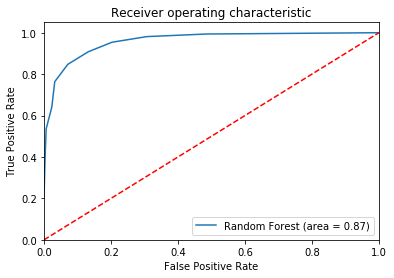

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =auto         Maximum Depth =100
CONFUSION MATRIX:   
[[1093   36]
 [ 113  365]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.97      0.94      1129
          1       0.91      0.76      0.83       478

avg / total       0.91      0.91      0.90      1607

ROC CURVE


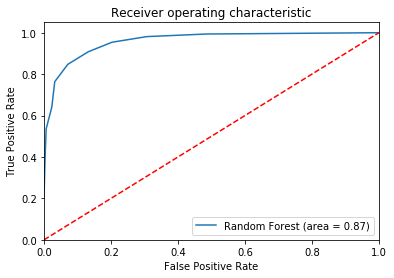

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =auto         Maximum Depth =150
CONFUSION MATRIX:   
[[1093   36]
 [ 113  365]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.97      0.94      1129
          1       0.91      0.76      0.83       478

avg / total       0.91      0.91      0.90      1607

ROC CURVE


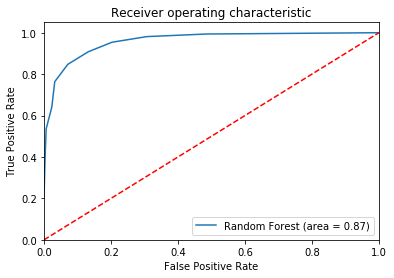

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =auto         Maximum Depth =None
CONFUSION MATRIX:   
[[1093   36]
 [ 113  365]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.97      0.94      1129
          1       0.91      0.76      0.83       478

avg / total       0.91      0.91      0.90      1607

ROC CURVE


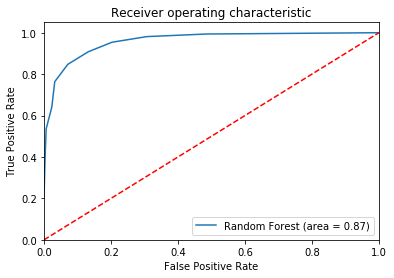

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =sqrt         Maximum Depth =1
CONFUSION MATRIX:   
[[788 341]
 [ 51 427]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.70      0.80      1129
          1       0.56      0.89      0.69       478

avg / total       0.83      0.76      0.77      1607

ROC CURVE


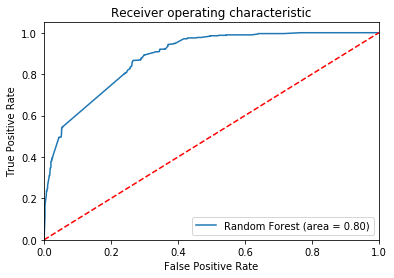

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =sqrt         Maximum Depth =10
CONFUSION MATRIX:   
[[1050   79]
 [  83  395]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.93      0.93      1129
          1       0.83      0.83      0.83       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


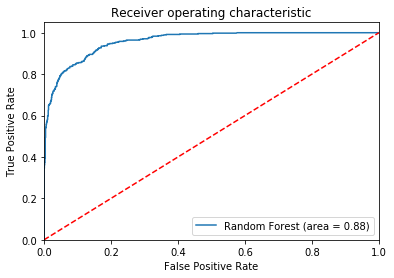

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =sqrt         Maximum Depth =50
CONFUSION MATRIX:   
[[1093   36]
 [ 113  365]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.97      0.94      1129
          1       0.91      0.76      0.83       478

avg / total       0.91      0.91      0.90      1607

ROC CURVE


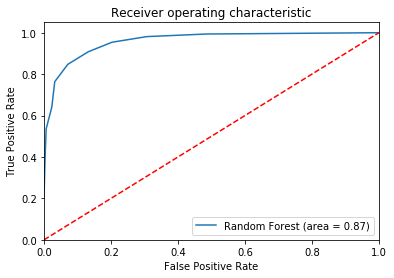

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =sqrt         Maximum Depth =100
CONFUSION MATRIX:   
[[1093   36]
 [ 113  365]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.97      0.94      1129
          1       0.91      0.76      0.83       478

avg / total       0.91      0.91      0.90      1607

ROC CURVE


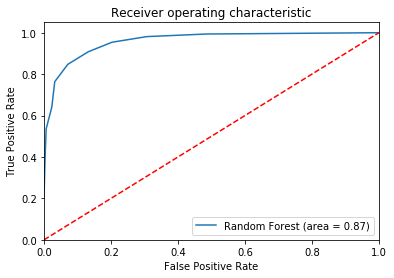

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =sqrt         Maximum Depth =150
CONFUSION MATRIX:   
[[1093   36]
 [ 113  365]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.97      0.94      1129
          1       0.91      0.76      0.83       478

avg / total       0.91      0.91      0.90      1607

ROC CURVE


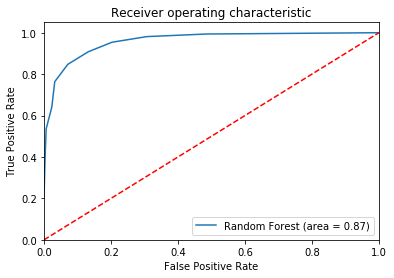

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =sqrt         Maximum Depth =None
CONFUSION MATRIX:   
[[1093   36]
 [ 113  365]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.97      0.94      1129
          1       0.91      0.76      0.83       478

avg / total       0.91      0.91      0.90      1607

ROC CURVE


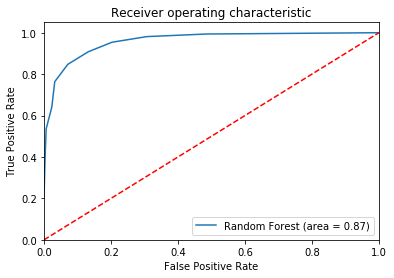

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =log2         Maximum Depth =1
CONFUSION MATRIX:   
[[909 220]
 [142 336]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.86      0.81      0.83      1129
          1       0.60      0.70      0.65       478

avg / total       0.79      0.77      0.78      1607

ROC CURVE


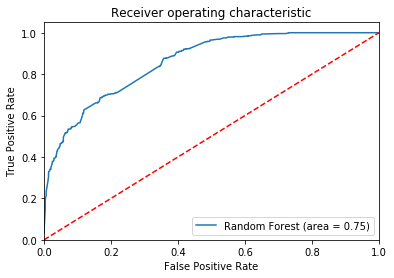

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =log2         Maximum Depth =10
CONFUSION MATRIX:   
[[1023  106]
 [ 107  371]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.91      0.91      1129
          1       0.78      0.78      0.78       478

avg / total       0.87      0.87      0.87      1607

ROC CURVE


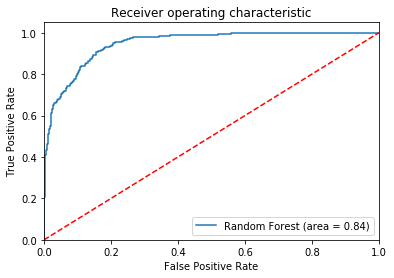

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =log2         Maximum Depth =50
CONFUSION MATRIX:   
[[1087   42]
 [ 145  333]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.88      0.96      0.92      1129
          1       0.89      0.70      0.78       478

avg / total       0.88      0.88      0.88      1607

ROC CURVE


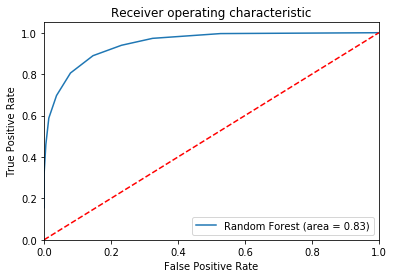

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =log2         Maximum Depth =100
CONFUSION MATRIX:   
[[1087   42]
 [ 145  333]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.88      0.96      0.92      1129
          1       0.89      0.70      0.78       478

avg / total       0.88      0.88      0.88      1607

ROC CURVE


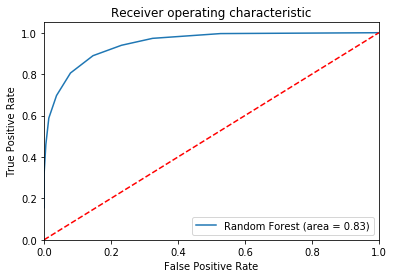

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =log2         Maximum Depth =150
CONFUSION MATRIX:   
[[1087   42]
 [ 145  333]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.88      0.96      0.92      1129
          1       0.89      0.70      0.78       478

avg / total       0.88      0.88      0.88      1607

ROC CURVE


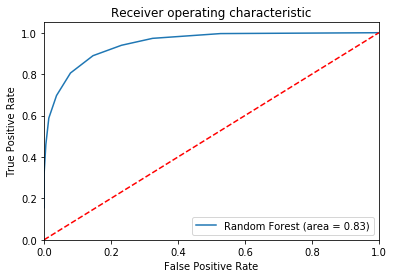

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =log2         Maximum Depth =None
CONFUSION MATRIX:   
[[1087   42]
 [ 145  333]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.88      0.96      0.92      1129
          1       0.89      0.70      0.78       478

avg / total       0.88      0.88      0.88      1607

ROC CURVE


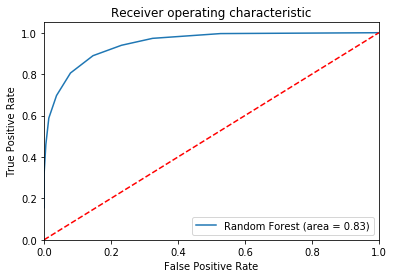

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =None         Maximum Depth =1
CONFUSION MATRIX:   
[[827 302]
 [100 378]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.89      0.73      0.80      1129
          1       0.56      0.79      0.65       478

avg / total       0.79      0.75      0.76      1607

ROC CURVE


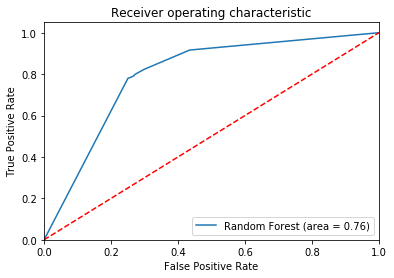

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =None         Maximum Depth =10
CONFUSION MATRIX:   
[[1065   64]
 [  67  411]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.94      0.94      1129
          1       0.87      0.86      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


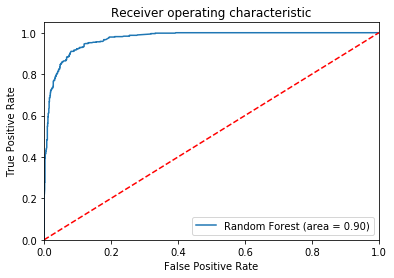

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =None         Maximum Depth =50
CONFUSION MATRIX:   
[[1077   52]
 [  80  398]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.95      0.94      1129
          1       0.88      0.83      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


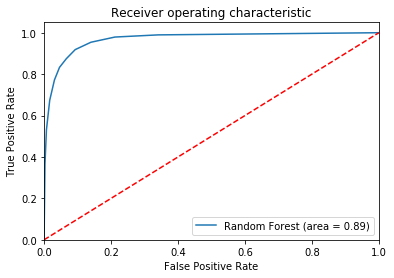

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =None         Maximum Depth =100
CONFUSION MATRIX:   
[[1077   52]
 [  80  398]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.95      0.94      1129
          1       0.88      0.83      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


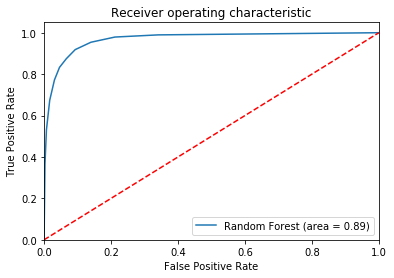

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =None         Maximum Depth =150
CONFUSION MATRIX:   
[[1077   52]
 [  80  398]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.95      0.94      1129
          1       0.88      0.83      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


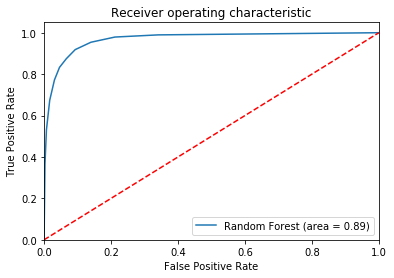

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =10          Maximum Features =None         Maximum Depth =None
CONFUSION MATRIX:   
[[1077   52]
 [  80  398]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.95      0.94      1129
          1       0.88      0.83      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


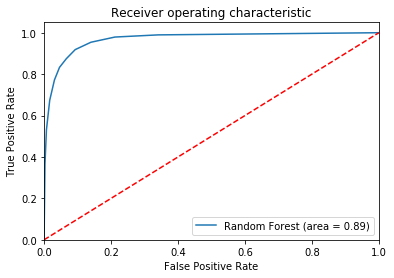

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =auto         Maximum Depth =1
CONFUSION MATRIX:   
[[808 321]
 [ 57 421]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.72      0.81      1129
          1       0.57      0.88      0.69       478

avg / total       0.83      0.76      0.77      1607

ROC CURVE


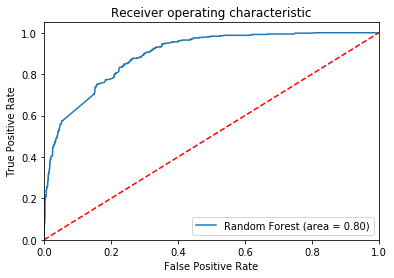

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =auto         Maximum Depth =10
CONFUSION MATRIX:   
[[1067   62]
 [  77  401]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.95      0.94      1129
          1       0.87      0.84      0.85       478

avg / total       0.91      0.91      0.91      1607

ROC CURVE


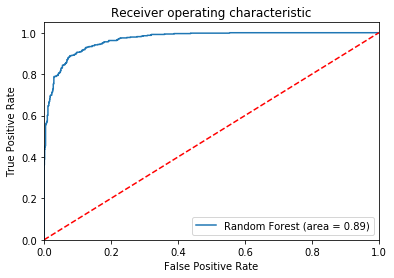

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =auto         Maximum Depth =50
CONFUSION MATRIX:   
[[1096   33]
 [  96  382]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      1129
          1       0.92      0.80      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


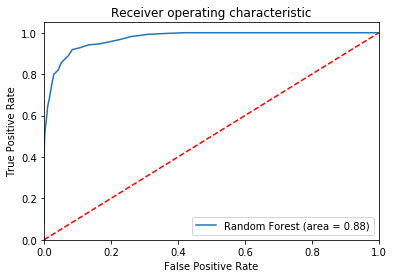

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =auto         Maximum Depth =100
CONFUSION MATRIX:   
[[1096   33]
 [  96  382]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      1129
          1       0.92      0.80      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


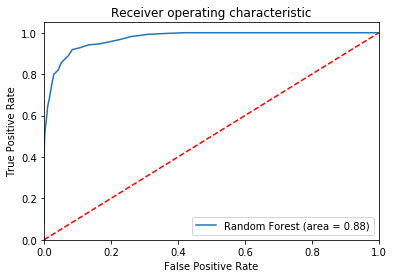

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =auto         Maximum Depth =150
CONFUSION MATRIX:   
[[1096   33]
 [  96  382]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      1129
          1       0.92      0.80      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


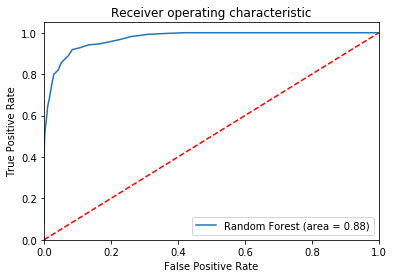

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =auto         Maximum Depth =None
CONFUSION MATRIX:   
[[1096   33]
 [  96  382]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      1129
          1       0.92      0.80      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


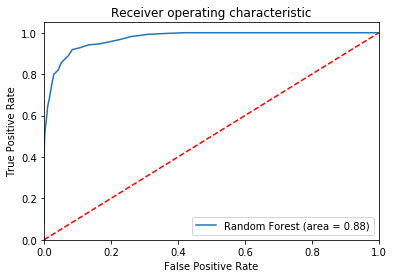

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =sqrt         Maximum Depth =1
CONFUSION MATRIX:   
[[808 321]
 [ 57 421]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.72      0.81      1129
          1       0.57      0.88      0.69       478

avg / total       0.83      0.76      0.77      1607

ROC CURVE


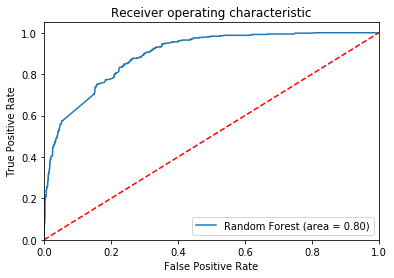

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =sqrt         Maximum Depth =10
CONFUSION MATRIX:   
[[1067   62]
 [  77  401]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.95      0.94      1129
          1       0.87      0.84      0.85       478

avg / total       0.91      0.91      0.91      1607

ROC CURVE


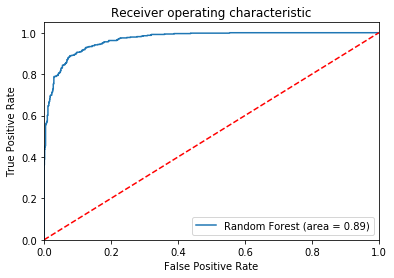

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =sqrt         Maximum Depth =50
CONFUSION MATRIX:   
[[1096   33]
 [  96  382]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      1129
          1       0.92      0.80      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


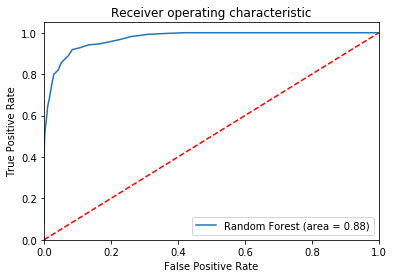

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =sqrt         Maximum Depth =100
CONFUSION MATRIX:   
[[1096   33]
 [  96  382]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      1129
          1       0.92      0.80      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


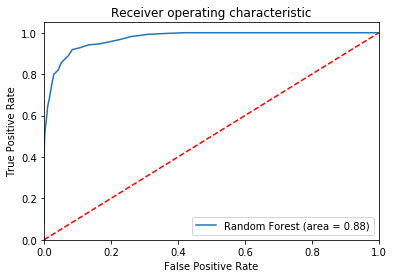

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =sqrt         Maximum Depth =150
CONFUSION MATRIX:   
[[1096   33]
 [  96  382]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      1129
          1       0.92      0.80      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


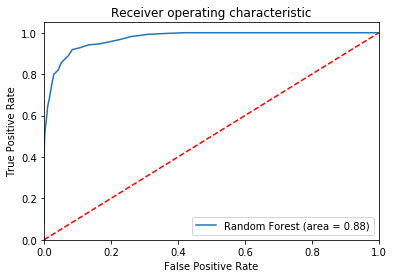

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =sqrt         Maximum Depth =None
CONFUSION MATRIX:   
[[1096   33]
 [  96  382]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.94      1129
          1       0.92      0.80      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


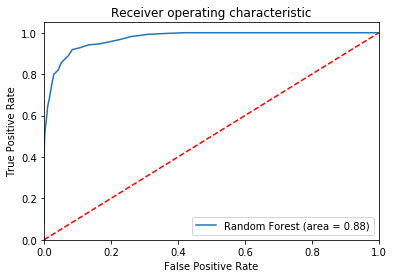

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =log2         Maximum Depth =1
CONFUSION MATRIX:   
[[849 280]
 [ 73 405]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.75      0.83      1129
          1       0.59      0.85      0.70       478

avg / total       0.82      0.78      0.79      1607

ROC CURVE


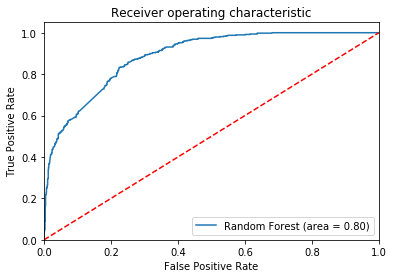

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =log2         Maximum Depth =10
CONFUSION MATRIX:   
[[1037   92]
 [  82  396]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.92      0.92      1129
          1       0.81      0.83      0.82       478

avg / total       0.89      0.89      0.89      1607

ROC CURVE


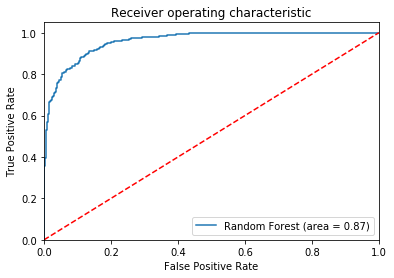

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =log2         Maximum Depth =50
CONFUSION MATRIX:   
[[1090   39]
 [ 123  355]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.97      0.93      1129
          1       0.90      0.74      0.81       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


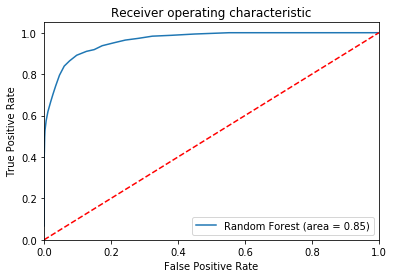

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =log2         Maximum Depth =100
CONFUSION MATRIX:   
[[1090   39]
 [ 123  355]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.97      0.93      1129
          1       0.90      0.74      0.81       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


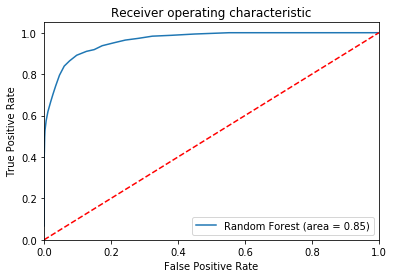

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =log2         Maximum Depth =150
CONFUSION MATRIX:   
[[1090   39]
 [ 123  355]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.97      0.93      1129
          1       0.90      0.74      0.81       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


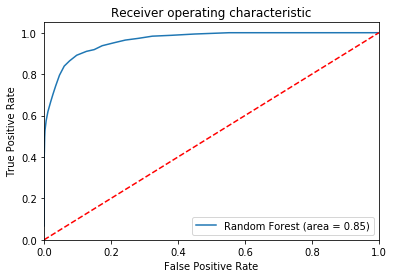

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =log2         Maximum Depth =None
CONFUSION MATRIX:   
[[1090   39]
 [ 123  355]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.97      0.93      1129
          1       0.90      0.74      0.81       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


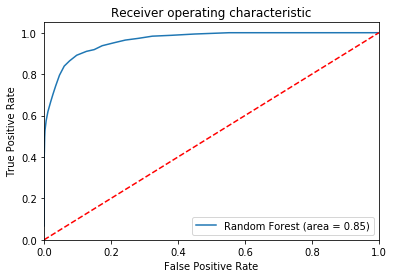

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =None         Maximum Depth =1
CONFUSION MATRIX:   
[[824 305]
 [ 97 381]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.89      0.73      0.80      1129
          1       0.56      0.80      0.65       478

avg / total       0.79      0.75      0.76      1607

ROC CURVE


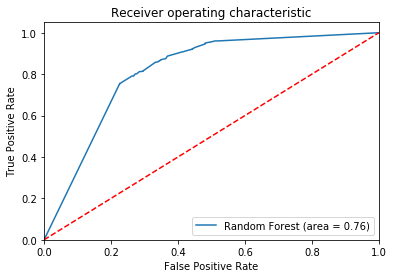

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =None         Maximum Depth =10
CONFUSION MATRIX:   
[[1071   58]
 [  59  419]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.95      0.95      1129
          1       0.88      0.88      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


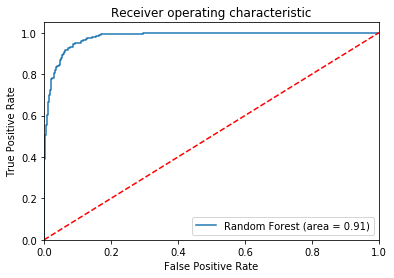

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =None         Maximum Depth =50
CONFUSION MATRIX:   
[[1081   48]
 [  73  405]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1129
          1       0.89      0.85      0.87       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


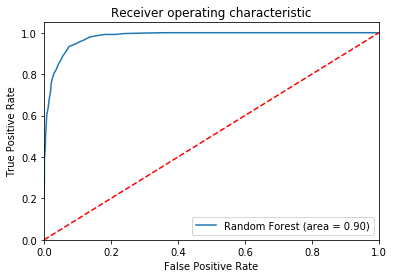

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =None         Maximum Depth =100
CONFUSION MATRIX:   
[[1081   48]
 [  73  405]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1129
          1       0.89      0.85      0.87       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


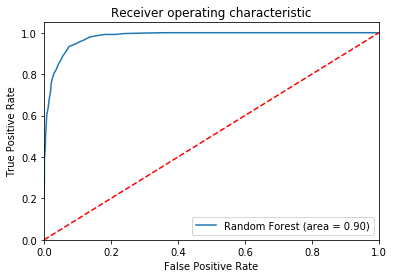

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =None         Maximum Depth =150
CONFUSION MATRIX:   
[[1081   48]
 [  73  405]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1129
          1       0.89      0.85      0.87       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


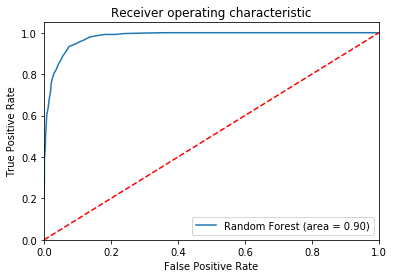

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =30          Maximum Features =None         Maximum Depth =None
CONFUSION MATRIX:   
[[1081   48]
 [  73  405]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1129
          1       0.89      0.85      0.87       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


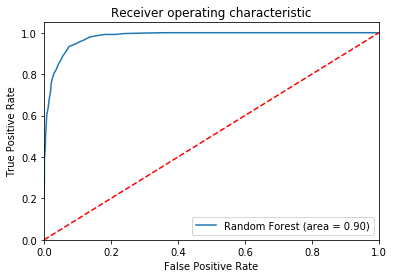

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =auto         Maximum Depth =1
CONFUSION MATRIX:   
[[817 312]
 [ 54 424]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.72      0.82      1129
          1       0.58      0.89      0.70       478

avg / total       0.83      0.77      0.78      1607

ROC CURVE


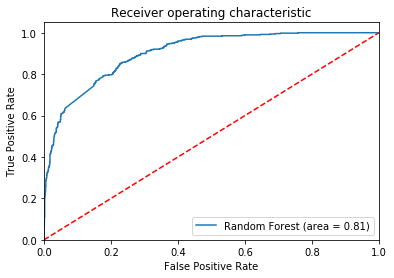

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =auto         Maximum Depth =10
CONFUSION MATRIX:   
[[1067   62]
 [  71  407]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.95      0.94      1129
          1       0.87      0.85      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


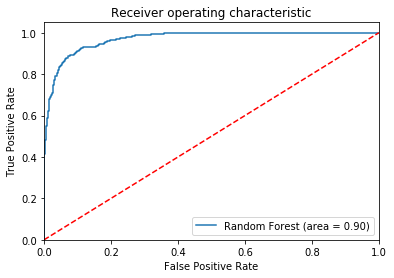

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =auto         Maximum Depth =50
CONFUSION MATRIX:   
[[1096   33]
 [  91  387]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.95      1129
          1       0.92      0.81      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


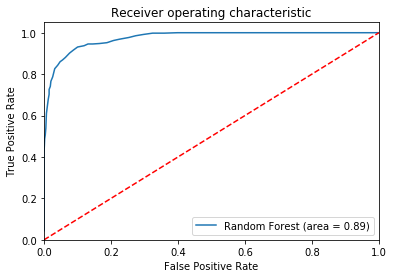

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =auto         Maximum Depth =100
CONFUSION MATRIX:   
[[1096   33]
 [  91  387]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.95      1129
          1       0.92      0.81      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


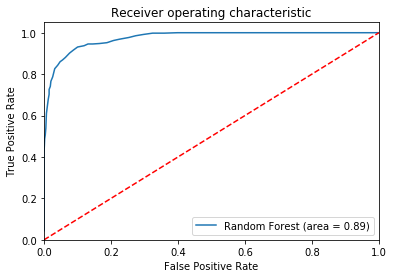

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =auto         Maximum Depth =150
CONFUSION MATRIX:   
[[1096   33]
 [  91  387]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.95      1129
          1       0.92      0.81      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


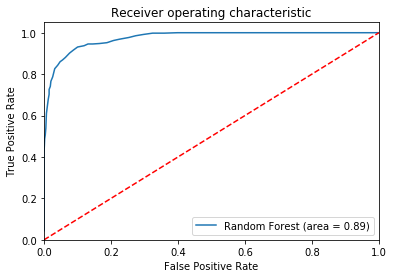

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =auto         Maximum Depth =None
CONFUSION MATRIX:   
[[1096   33]
 [  91  387]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.95      1129
          1       0.92      0.81      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


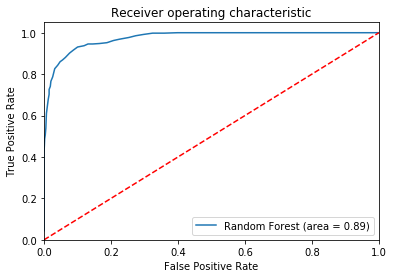

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =sqrt         Maximum Depth =1
CONFUSION MATRIX:   
[[817 312]
 [ 54 424]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.72      0.82      1129
          1       0.58      0.89      0.70       478

avg / total       0.83      0.77      0.78      1607

ROC CURVE


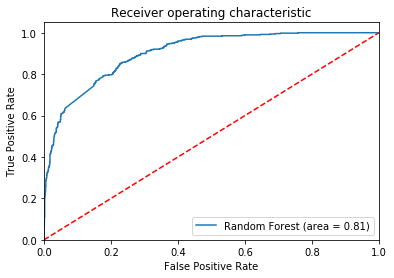

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =sqrt         Maximum Depth =10
CONFUSION MATRIX:   
[[1067   62]
 [  71  407]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.95      0.94      1129
          1       0.87      0.85      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


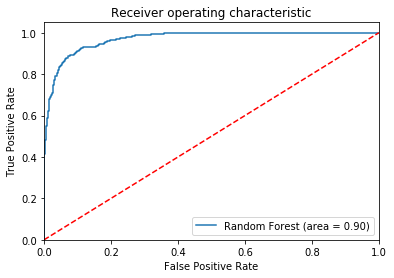

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =sqrt         Maximum Depth =50
CONFUSION MATRIX:   
[[1096   33]
 [  91  387]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.95      1129
          1       0.92      0.81      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


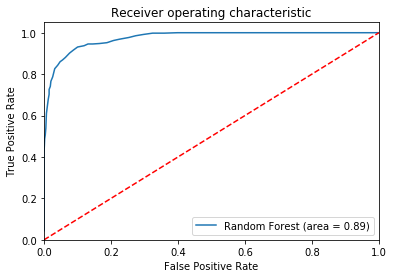

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =sqrt         Maximum Depth =100
CONFUSION MATRIX:   
[[1096   33]
 [  91  387]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.95      1129
          1       0.92      0.81      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


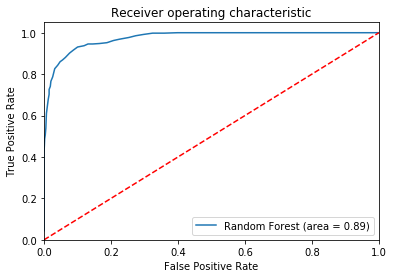

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =sqrt         Maximum Depth =150
CONFUSION MATRIX:   
[[1096   33]
 [  91  387]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.95      1129
          1       0.92      0.81      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


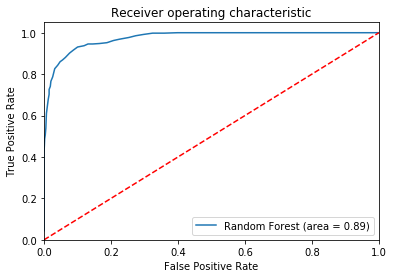

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =sqrt         Maximum Depth =None
CONFUSION MATRIX:   
[[1096   33]
 [  91  387]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.95      1129
          1       0.92      0.81      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


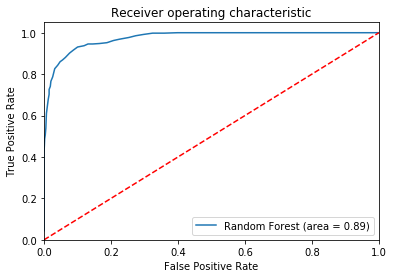

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =log2         Maximum Depth =1
CONFUSION MATRIX:   
[[842 287]
 [ 72 406]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.75      0.82      1129
          1       0.59      0.85      0.69       478

avg / total       0.82      0.78      0.79      1607

ROC CURVE


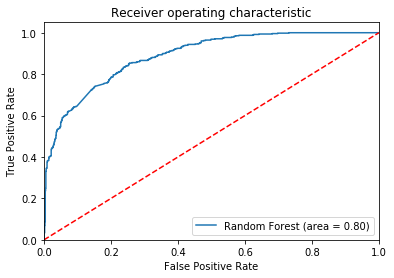

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =log2         Maximum Depth =10
CONFUSION MATRIX:   
[[1050   79]
 [  80  398]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.93      0.93      1129
          1       0.83      0.83      0.83       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


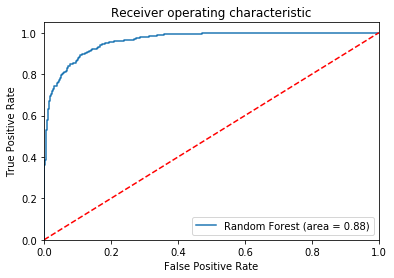

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =log2         Maximum Depth =50
CONFUSION MATRIX:   
[[1094   35]
 [ 110  368]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.97      0.94      1129
          1       0.91      0.77      0.84       478

avg / total       0.91      0.91      0.91      1607

ROC CURVE


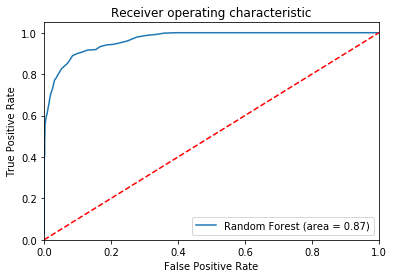

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =log2         Maximum Depth =100
CONFUSION MATRIX:   
[[1094   35]
 [ 110  368]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.97      0.94      1129
          1       0.91      0.77      0.84       478

avg / total       0.91      0.91      0.91      1607

ROC CURVE


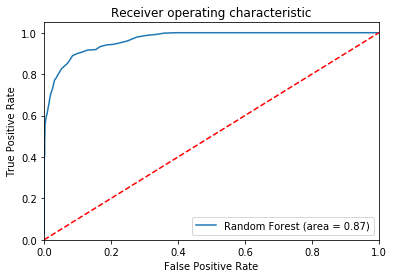

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =log2         Maximum Depth =150
CONFUSION MATRIX:   
[[1094   35]
 [ 110  368]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.97      0.94      1129
          1       0.91      0.77      0.84       478

avg / total       0.91      0.91      0.91      1607

ROC CURVE


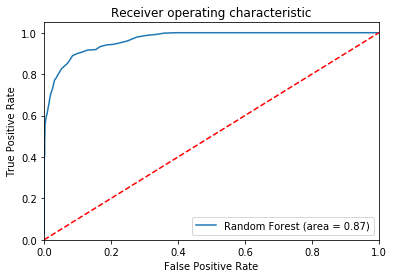

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =log2         Maximum Depth =None
CONFUSION MATRIX:   
[[1094   35]
 [ 110  368]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.97      0.94      1129
          1       0.91      0.77      0.84       478

avg / total       0.91      0.91      0.91      1607

ROC CURVE


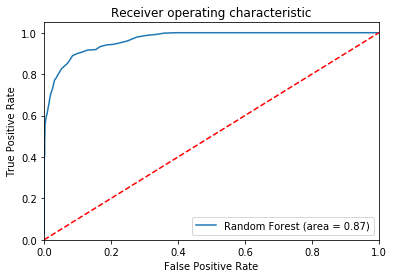

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =None         Maximum Depth =1
CONFUSION MATRIX:   
[[821 308]
 [ 95 383]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.73      0.80      1129
          1       0.55      0.80      0.66       478

avg / total       0.79      0.75      0.76      1607

ROC CURVE


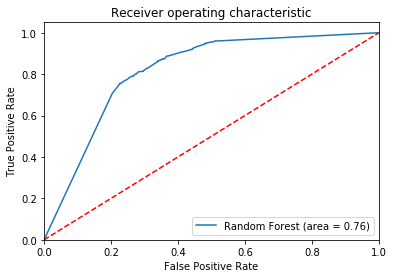

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =None         Maximum Depth =10
CONFUSION MATRIX:   
[[1069   60]
 [  57  421]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.95      0.95      1129
          1       0.88      0.88      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


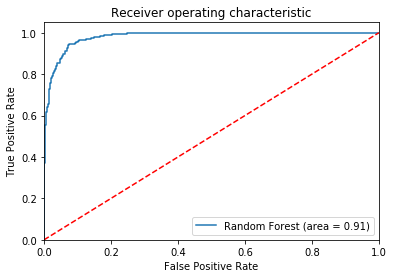

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =None         Maximum Depth =50
CONFUSION MATRIX:   
[[1081   48]
 [  67  411]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1129
          1       0.90      0.86      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


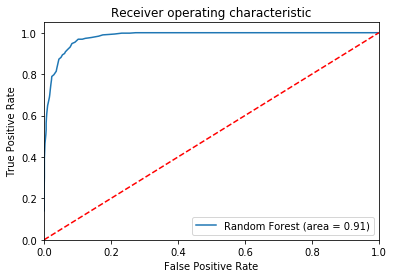

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =None         Maximum Depth =100
CONFUSION MATRIX:   
[[1081   48]
 [  67  411]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1129
          1       0.90      0.86      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


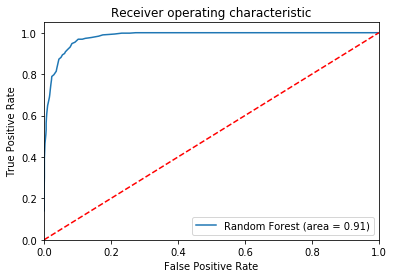

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =None         Maximum Depth =150
CONFUSION MATRIX:   
[[1081   48]
 [  67  411]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1129
          1       0.90      0.86      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


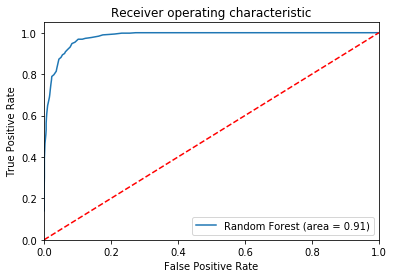

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =50          Maximum Features =None         Maximum Depth =None
CONFUSION MATRIX:   
[[1081   48]
 [  67  411]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1129
          1       0.90      0.86      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


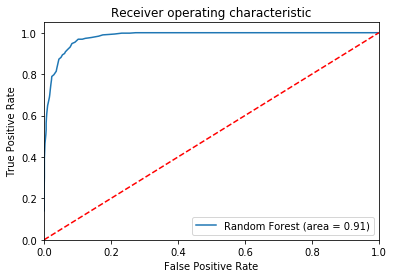

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =auto         Maximum Depth =1
CONFUSION MATRIX:   
[[819 310]
 [ 57 421]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.73      0.82      1129
          1       0.58      0.88      0.70       478

avg / total       0.83      0.77      0.78      1607

ROC CURVE


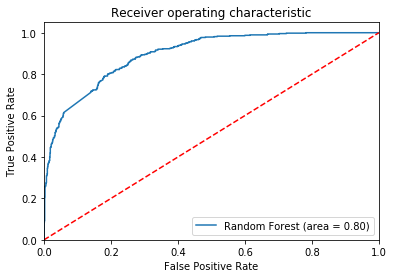

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =auto         Maximum Depth =10
CONFUSION MATRIX:   
[[1069   60]
 [  71  407]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.95      0.94      1129
          1       0.87      0.85      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


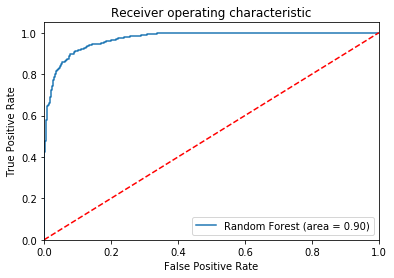

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =auto         Maximum Depth =50
CONFUSION MATRIX:   
[[1097   32]
 [  90  388]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.95      1129
          1       0.92      0.81      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


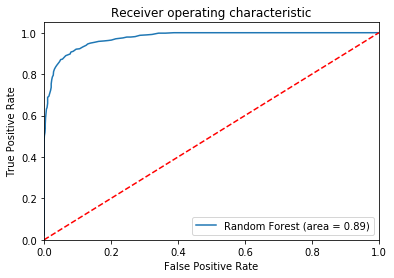

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =auto         Maximum Depth =100
CONFUSION MATRIX:   
[[1097   32]
 [  90  388]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.95      1129
          1       0.92      0.81      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


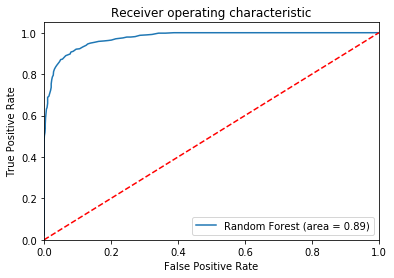

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =auto         Maximum Depth =150
CONFUSION MATRIX:   
[[1097   32]
 [  90  388]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.95      1129
          1       0.92      0.81      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


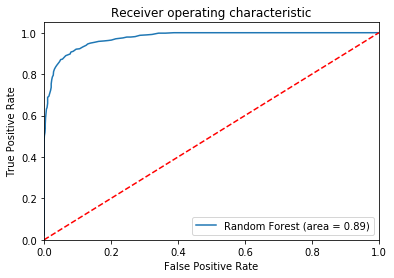

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =auto         Maximum Depth =None
CONFUSION MATRIX:   
[[1097   32]
 [  90  388]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.95      1129
          1       0.92      0.81      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


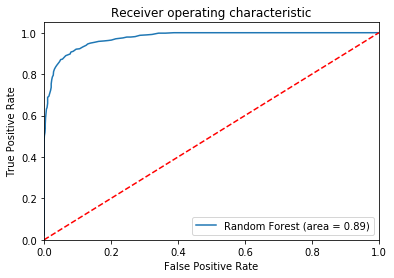

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =sqrt         Maximum Depth =1
CONFUSION MATRIX:   
[[819 310]
 [ 57 421]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.73      0.82      1129
          1       0.58      0.88      0.70       478

avg / total       0.83      0.77      0.78      1607

ROC CURVE


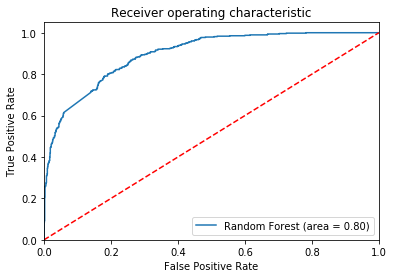

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =sqrt         Maximum Depth =10
CONFUSION MATRIX:   
[[1069   60]
 [  71  407]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.95      0.94      1129
          1       0.87      0.85      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


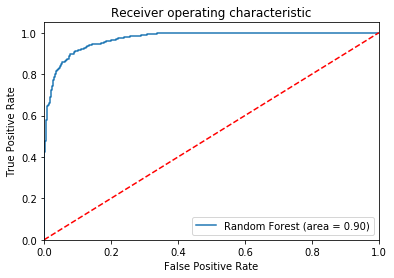

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =sqrt         Maximum Depth =50
CONFUSION MATRIX:   
[[1097   32]
 [  90  388]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.95      1129
          1       0.92      0.81      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


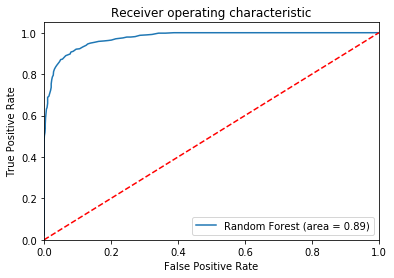

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =sqrt         Maximum Depth =100
CONFUSION MATRIX:   
[[1097   32]
 [  90  388]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.95      1129
          1       0.92      0.81      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


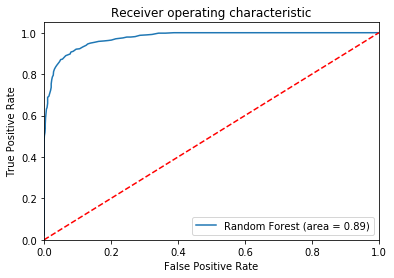

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =sqrt         Maximum Depth =150
CONFUSION MATRIX:   
[[1097   32]
 [  90  388]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.95      1129
          1       0.92      0.81      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


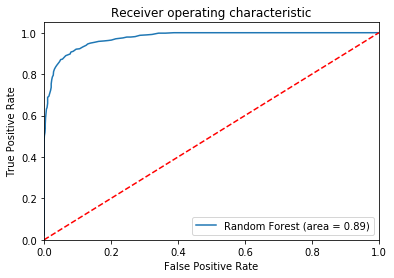

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =sqrt         Maximum Depth =None
CONFUSION MATRIX:   
[[1097   32]
 [  90  388]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.97      0.95      1129
          1       0.92      0.81      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


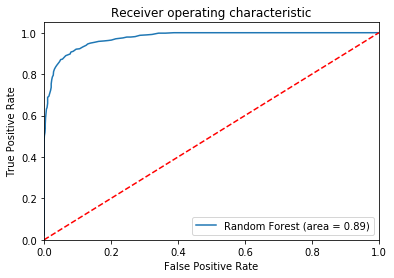

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =log2         Maximum Depth =1
CONFUSION MATRIX:   
[[825 304]
 [ 73 405]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.73      0.81      1129
          1       0.57      0.85      0.68       478

avg / total       0.82      0.77      0.77      1607

ROC CURVE


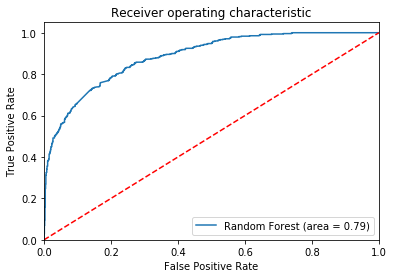

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =log2         Maximum Depth =10
CONFUSION MATRIX:   
[[1052   77]
 [  73  405]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.93      0.93      1129
          1       0.84      0.85      0.84       478

avg / total       0.91      0.91      0.91      1607

ROC CURVE


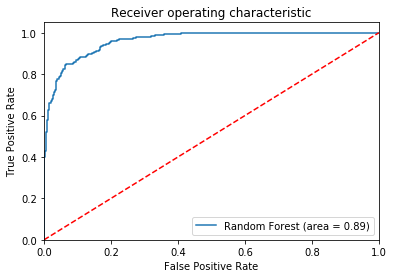

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =log2         Maximum Depth =50
CONFUSION MATRIX:   
[[1094   35]
 [ 117  361]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.97      0.94      1129
          1       0.91      0.76      0.83       478

avg / total       0.91      0.91      0.90      1607

ROC CURVE


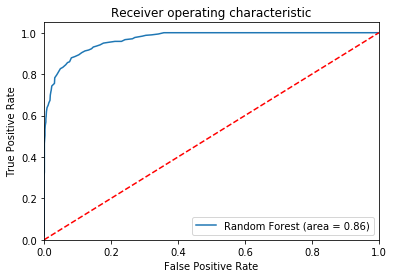

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =log2         Maximum Depth =100
CONFUSION MATRIX:   
[[1094   35]
 [ 117  361]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.97      0.94      1129
          1       0.91      0.76      0.83       478

avg / total       0.91      0.91      0.90      1607

ROC CURVE


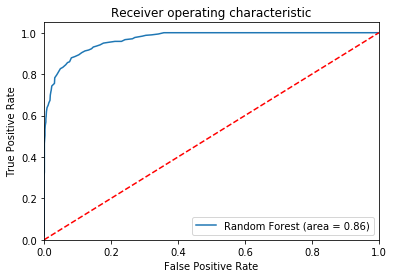

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =log2         Maximum Depth =150
CONFUSION MATRIX:   
[[1094   35]
 [ 117  361]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.97      0.94      1129
          1       0.91      0.76      0.83       478

avg / total       0.91      0.91      0.90      1607

ROC CURVE


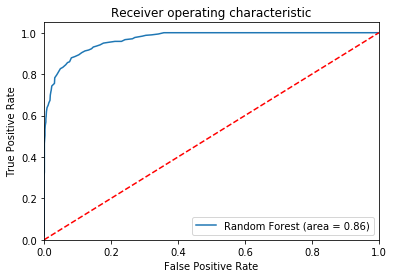

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =log2         Maximum Depth =None
CONFUSION MATRIX:   
[[1094   35]
 [ 117  361]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.97      0.94      1129
          1       0.91      0.76      0.83       478

avg / total       0.91      0.91      0.90      1607

ROC CURVE


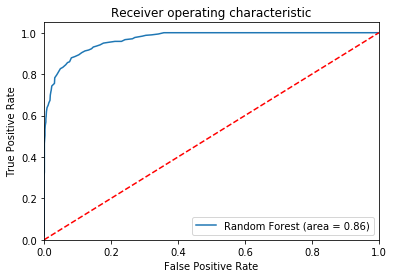

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =None         Maximum Depth =1
CONFUSION MATRIX:   
[[827 302]
 [100 378]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.89      0.73      0.80      1129
          1       0.56      0.79      0.65       478

avg / total       0.79      0.75      0.76      1607

ROC CURVE


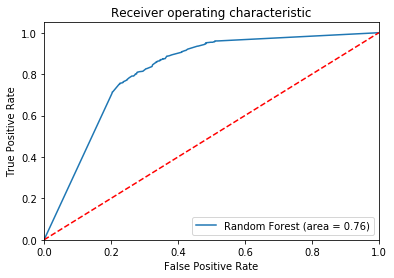

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =None         Maximum Depth =10
CONFUSION MATRIX:   
[[1073   56]
 [  53  425]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.95      0.95      1129
          1       0.88      0.89      0.89       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


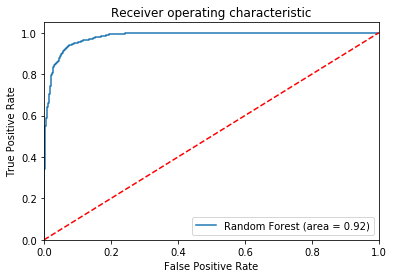

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =None         Maximum Depth =50
CONFUSION MATRIX:   
[[1084   45]
 [  63  415]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.96      0.95      1129
          1       0.90      0.87      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


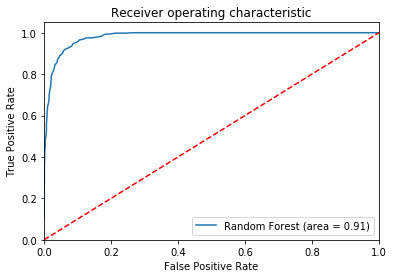

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =None         Maximum Depth =100
CONFUSION MATRIX:   
[[1084   45]
 [  63  415]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.96      0.95      1129
          1       0.90      0.87      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


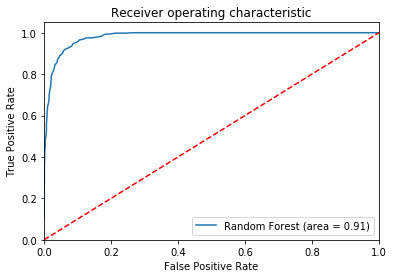

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =None         Maximum Depth =150
CONFUSION MATRIX:   
[[1084   45]
 [  63  415]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.96      0.95      1129
          1       0.90      0.87      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


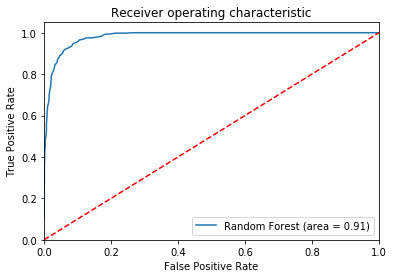

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =80          Maximum Features =None         Maximum Depth =None
CONFUSION MATRIX:   
[[1084   45]
 [  63  415]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.96      0.95      1129
          1       0.90      0.87      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


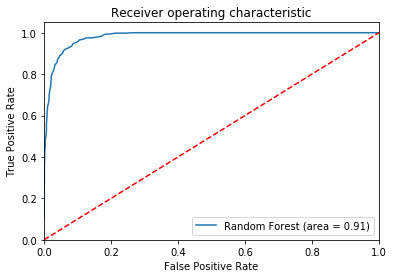

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =auto         Maximum Depth =1
CONFUSION MATRIX:   
[[831 298]
 [ 60 418]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.74      0.82      1129
          1       0.58      0.87      0.70       478

avg / total       0.83      0.78      0.79      1607

ROC CURVE


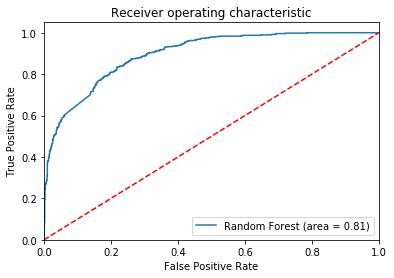

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =auto         Maximum Depth =10
CONFUSION MATRIX:   
[[1069   60]
 [  69  409]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.95      0.94      1129
          1       0.87      0.86      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


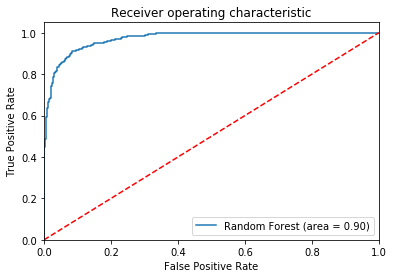

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =auto         Maximum Depth =50
CONFUSION MATRIX:   
[[1100   29]
 [  87  391]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.97      0.95      1129
          1       0.93      0.82      0.87       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


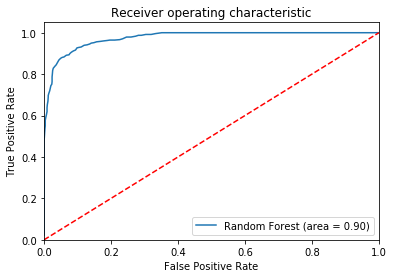

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =auto         Maximum Depth =100
CONFUSION MATRIX:   
[[1100   29]
 [  87  391]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.97      0.95      1129
          1       0.93      0.82      0.87       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


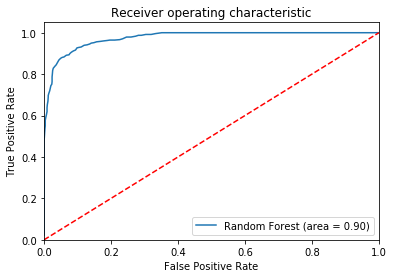

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =auto         Maximum Depth =150
CONFUSION MATRIX:   
[[1100   29]
 [  87  391]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.97      0.95      1129
          1       0.93      0.82      0.87       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


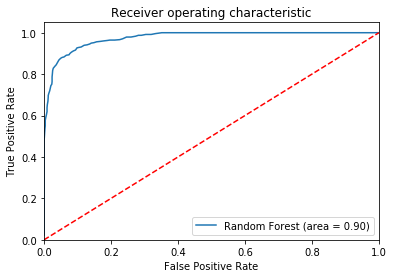

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =auto         Maximum Depth =None
CONFUSION MATRIX:   
[[1100   29]
 [  87  391]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.97      0.95      1129
          1       0.93      0.82      0.87       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


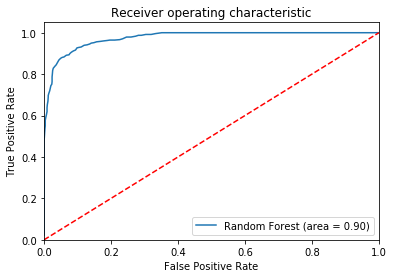

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =sqrt         Maximum Depth =1
CONFUSION MATRIX:   
[[831 298]
 [ 60 418]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.74      0.82      1129
          1       0.58      0.87      0.70       478

avg / total       0.83      0.78      0.79      1607

ROC CURVE


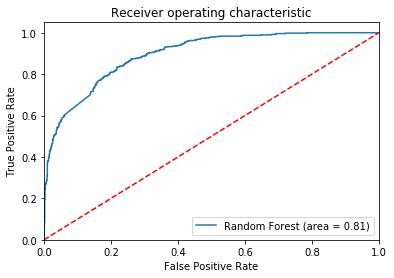

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =sqrt         Maximum Depth =10
CONFUSION MATRIX:   
[[1069   60]
 [  69  409]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.95      0.94      1129
          1       0.87      0.86      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


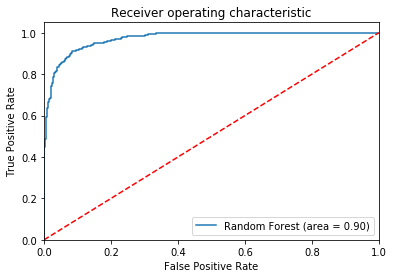

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =sqrt         Maximum Depth =50
CONFUSION MATRIX:   
[[1100   29]
 [  87  391]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.97      0.95      1129
          1       0.93      0.82      0.87       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


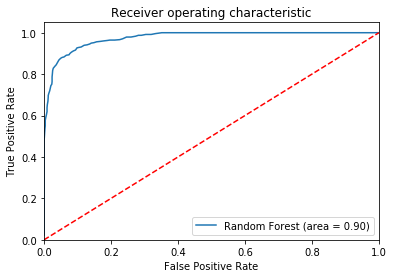

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =sqrt         Maximum Depth =100
CONFUSION MATRIX:   
[[1100   29]
 [  87  391]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.97      0.95      1129
          1       0.93      0.82      0.87       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


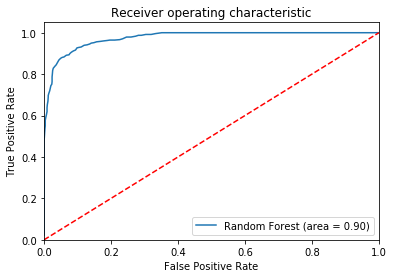

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =sqrt         Maximum Depth =150
CONFUSION MATRIX:   
[[1100   29]
 [  87  391]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.97      0.95      1129
          1       0.93      0.82      0.87       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


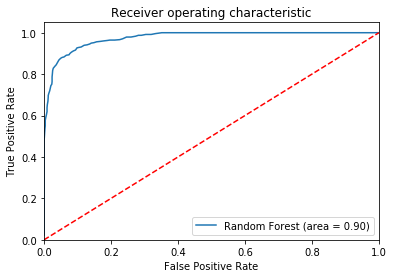

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =sqrt         Maximum Depth =None
CONFUSION MATRIX:   
[[1100   29]
 [  87  391]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.97      0.95      1129
          1       0.93      0.82      0.87       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


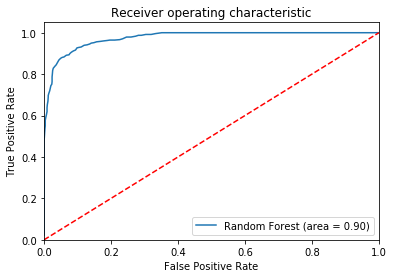

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =log2         Maximum Depth =1
CONFUSION MATRIX:   
[[837 292]
 [ 74 404]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.74      0.82      1129
          1       0.58      0.85      0.69       478

avg / total       0.82      0.77      0.78      1607

ROC CURVE


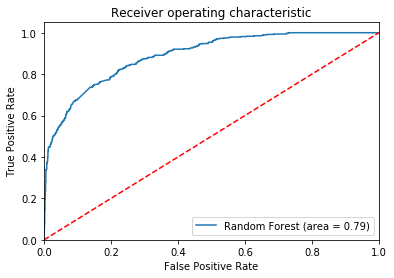

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =log2         Maximum Depth =10
CONFUSION MATRIX:   
[[1050   79]
 [  79  399]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.93      0.93      1129
          1       0.83      0.83      0.83       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


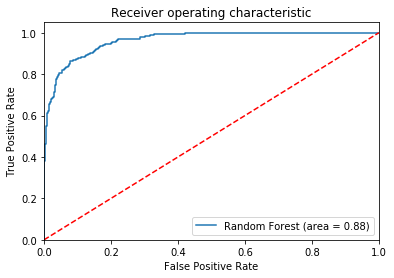

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =log2         Maximum Depth =50
CONFUSION MATRIX:   
[[1097   32]
 [ 113  365]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.97      0.94      1129
          1       0.92      0.76      0.83       478

avg / total       0.91      0.91      0.91      1607

ROC CURVE


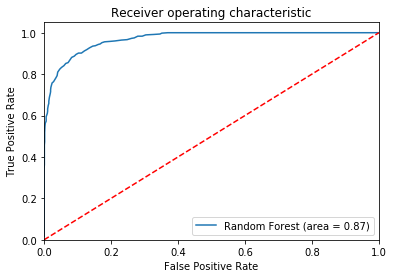

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =log2         Maximum Depth =100
CONFUSION MATRIX:   
[[1097   32]
 [ 113  365]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.97      0.94      1129
          1       0.92      0.76      0.83       478

avg / total       0.91      0.91      0.91      1607

ROC CURVE


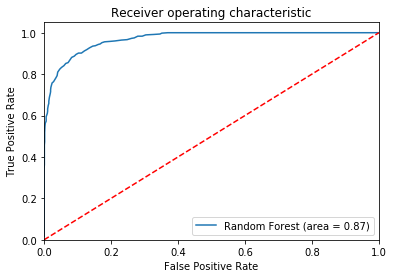

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =log2         Maximum Depth =150
CONFUSION MATRIX:   
[[1097   32]
 [ 113  365]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.97      0.94      1129
          1       0.92      0.76      0.83       478

avg / total       0.91      0.91      0.91      1607

ROC CURVE


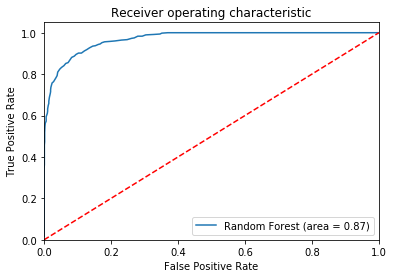

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =log2         Maximum Depth =None
CONFUSION MATRIX:   
[[1097   32]
 [ 113  365]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.97      0.94      1129
          1       0.92      0.76      0.83       478

avg / total       0.91      0.91      0.91      1607

ROC CURVE


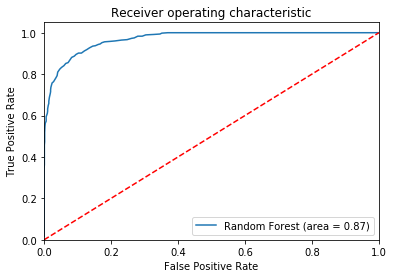

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =None         Maximum Depth =1
CONFUSION MATRIX:   
[[829 300]
 [100 378]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.89      0.73      0.81      1129
          1       0.56      0.79      0.65       478

avg / total       0.79      0.75      0.76      1607

ROC CURVE


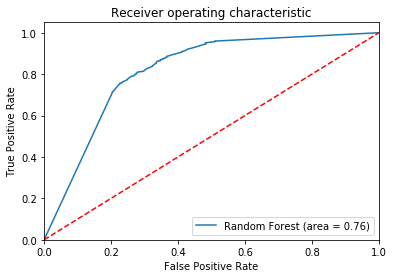

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =None         Maximum Depth =10
CONFUSION MATRIX:   
[[1074   55]
 [  50  428]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.96      0.95      0.95      1129
          1       0.89      0.90      0.89       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


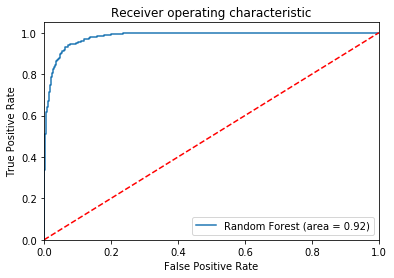

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =None         Maximum Depth =50
CONFUSION MATRIX:   
[[1085   44]
 [  63  415]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.96      0.95      1129
          1       0.90      0.87      0.89       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


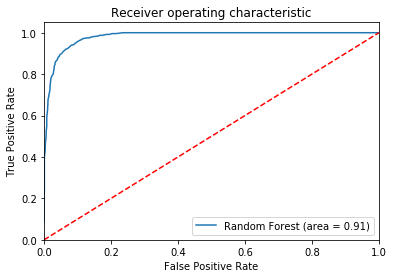

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =None         Maximum Depth =100
CONFUSION MATRIX:   
[[1085   44]
 [  63  415]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.96      0.95      1129
          1       0.90      0.87      0.89       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


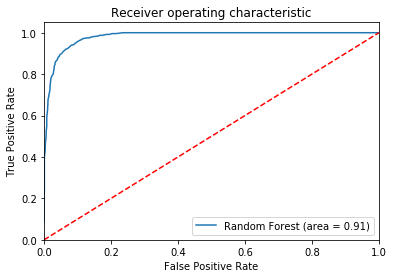

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =None         Maximum Depth =150
CONFUSION MATRIX:   
[[1085   44]
 [  63  415]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.96      0.95      1129
          1       0.90      0.87      0.89       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


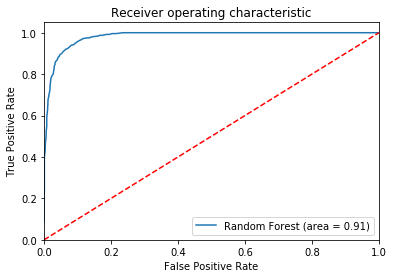

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Estimators =100          Maximum Features =None         Maximum Depth =None
CONFUSION MATRIX:   
[[1085   44]
 [  63  415]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.96      0.95      1129
          1       0.90      0.87      0.89       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


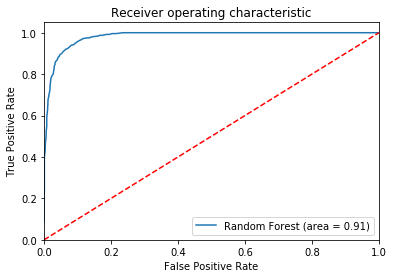

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
Time Elapsed:
1239.3873264415442


In [29]:
#Find optimal parameters
start_time = timeit.default_timer()
for i in Estimators:
    for j in maxFeatures:
        for k in maxDepth:
            hyperparameterTuneRandomForest(i,j,k,X_train_selected,y_train,X_validation_selected,y_validation)
elapsed = timeit.default_timer() - start_time
print("Time Elapsed:")
print(elapsed)            

### Random Forest

###### OPTIMAL PARAMETERS
###### Estimators = 100 ----   max features = None   ---------     Max depth = 10
###### Execution time (1239.387 seconds)


# XGBoost  with Cross Validation

In [30]:
#HYPER PARAMETER TUNE
depthMax = [1,2,3,4,5]
learningRate = [0.1,0.05,0.01] 
estimators = [50,100,150,200]

In [31]:
def hyperparameterTuneXGBoost(i,j,k,X_train,y_train,X_test,y_test):

    XGBModel = XGBClassifier(max_depth=i,learning_rate=j, n_estimators=k,random_state=123)
    XGBModel.fit(X_train, y_train)

    y_pred = XGBModel.predict(X_test)

    # evaluate predictions
    print("  Max Depth =" + str(i) + "          Learning Rate =" + str(j) + "         Estimators =" + str(k) )


    print('CONFUSION MATRIX:   ')
    confusion_matrix2 = confusion_matrix(y_test, y_pred)
    print(confusion_matrix2)
    
    print('CLASSIFICATION REPORT:    ')
    print(classification_report(y_test, y_pred))

    print('ROC CURVE')
    logit_roc_auc = roc_auc_score(y_test, XGBModel.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, XGBModel.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    print('-------------------------------------------------------------')
    return

  Max Depth =1          Learning Rate =0.1         Estimators =50
CONFUSION MATRIX:   
[[1103   26]
 [ 184  294]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.86      0.98      0.91      1129
          1       0.92      0.62      0.74       478

avg / total       0.88      0.87      0.86      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


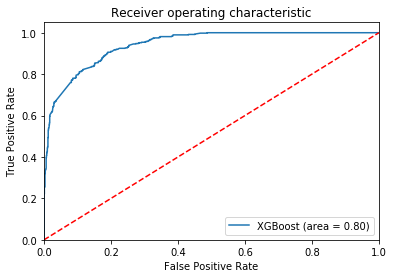

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.1         Estimators =100
CONFUSION MATRIX:   
[[1090   39]
 [ 125  353]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.97      0.93      1129
          1       0.90      0.74      0.81       478

avg / total       0.90      0.90      0.89      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


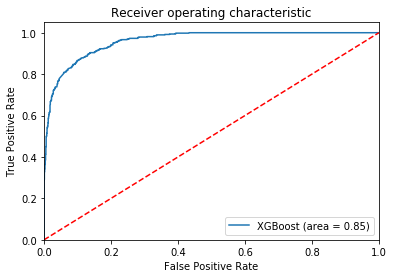

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.1         Estimators =150
CONFUSION MATRIX:   
[[1090   39]
 [ 102  376]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.97      0.94      1129
          1       0.91      0.79      0.84       478

avg / total       0.91      0.91      0.91      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


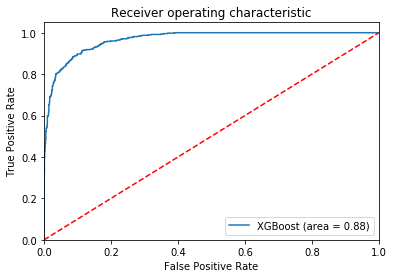

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.1         Estimators =200
CONFUSION MATRIX:   
[[1089   40]
 [  90  388]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.96      0.94      1129
          1       0.91      0.81      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


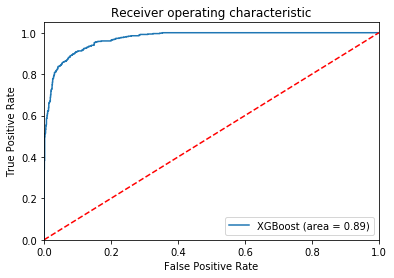

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.05         Estimators =50
CONFUSION MATRIX:   
[[1107   22]
 [ 250  228]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.82      0.98      0.89      1129
          1       0.91      0.48      0.63       478

avg / total       0.84      0.83      0.81      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


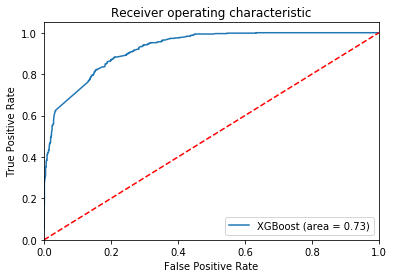

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.05         Estimators =100
CONFUSION MATRIX:   
[[1105   24]
 [ 185  293]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.86      0.98      0.91      1129
          1       0.92      0.61      0.74       478

avg / total       0.88      0.87      0.86      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


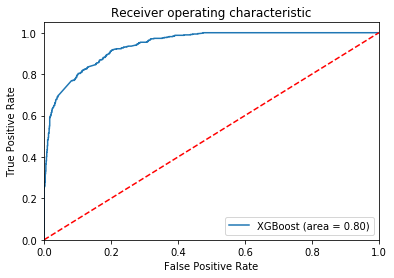

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.05         Estimators =150
CONFUSION MATRIX:   
[[1090   39]
 [ 145  333]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.88      0.97      0.92      1129
          1       0.90      0.70      0.78       478

avg / total       0.89      0.89      0.88      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


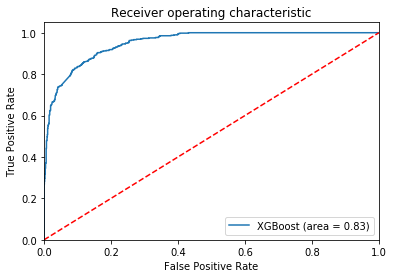

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.05         Estimators =200
CONFUSION MATRIX:   
[[1093   36]
 [ 127  351]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.97      0.93      1129
          1       0.91      0.73      0.81       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


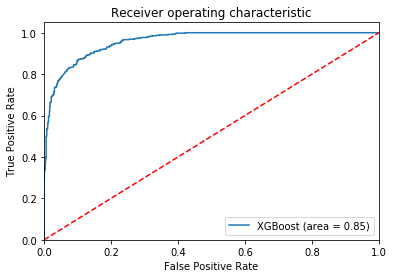

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.01         Estimators =50
CONFUSION MATRIX:   
[[1111   18]
 [ 313  165]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.78      0.98      0.87      1129
          1       0.90      0.35      0.50       478

avg / total       0.82      0.79      0.76      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


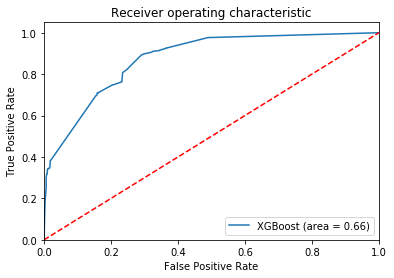

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.01         Estimators =100
CONFUSION MATRIX:   
[[1114   15]
 [ 297  181]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.79      0.99      0.88      1129
          1       0.92      0.38      0.54       478

avg / total       0.83      0.81      0.78      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


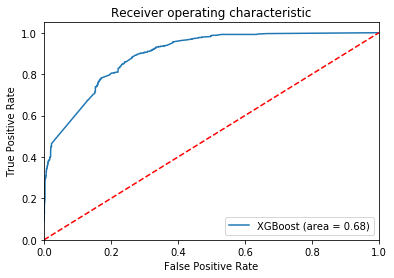

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.01         Estimators =150
CONFUSION MATRIX:   
[[1112   17]
 [ 289  189]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.79      0.98      0.88      1129
          1       0.92      0.40      0.55       478

avg / total       0.83      0.81      0.78      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


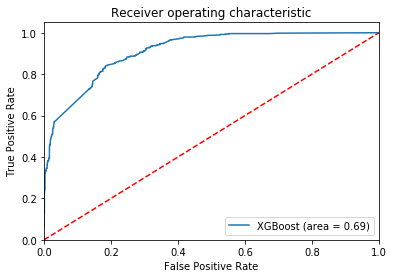

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =1          Learning Rate =0.01         Estimators =200
CONFUSION MATRIX:   
[[1112   17]
 [ 264  214]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.81      0.98      0.89      1129
          1       0.93      0.45      0.60       478

avg / total       0.84      0.83      0.80      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


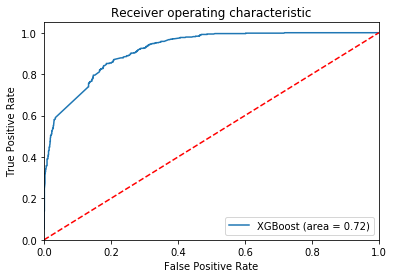

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.1         Estimators =50
CONFUSION MATRIX:   
[[1086   43]
 [  85  393]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.96      0.94      1129
          1       0.90      0.82      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


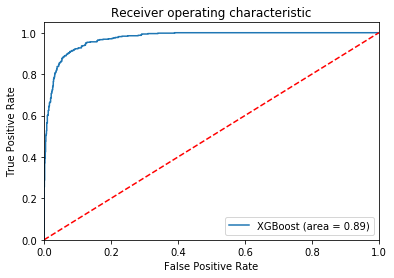

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.1         Estimators =100
CONFUSION MATRIX:   
[[1087   42]
 [  56  422]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.96      0.96      1129
          1       0.91      0.88      0.90       478

avg / total       0.94      0.94      0.94      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


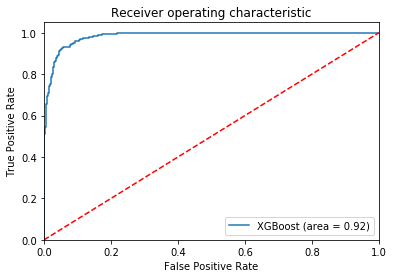

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.1         Estimators =150
CONFUSION MATRIX:   
[[1091   38]
 [  49  429]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.96      0.97      0.96      1129
          1       0.92      0.90      0.91       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


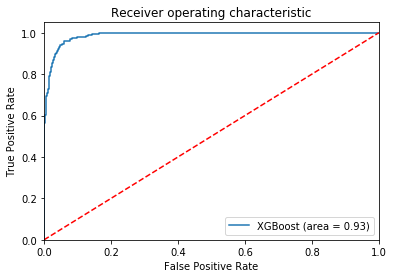

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.1         Estimators =200
CONFUSION MATRIX:   
[[1091   38]
 [  50  428]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.96      0.97      0.96      1129
          1       0.92      0.90      0.91       478

avg / total       0.94      0.95      0.95      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


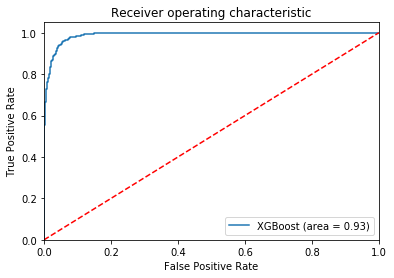

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.05         Estimators =50
CONFUSION MATRIX:   
[[1080   49]
 [ 115  363]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.90      0.96      0.93      1129
          1       0.88      0.76      0.82       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


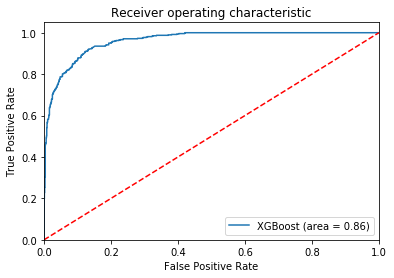

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.05         Estimators =100
CONFUSION MATRIX:   
[[1089   40]
 [  85  393]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.96      0.95      1129
          1       0.91      0.82      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


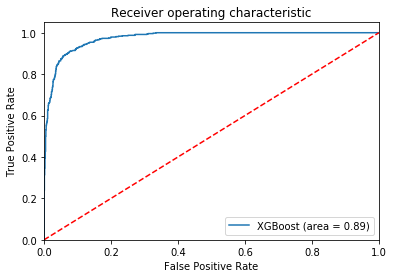

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.05         Estimators =150
CONFUSION MATRIX:   
[[1092   37]
 [  65  413]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.97      0.96      1129
          1       0.92      0.86      0.89       478

avg / total       0.94      0.94      0.94      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


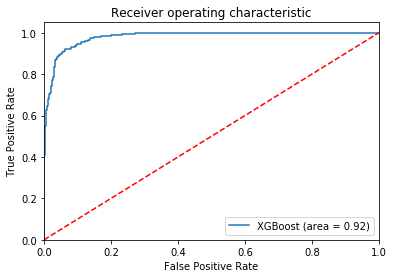

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.05         Estimators =200
CONFUSION MATRIX:   
[[1088   41]
 [  56  422]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.96      0.96      1129
          1       0.91      0.88      0.90       478

avg / total       0.94      0.94      0.94      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


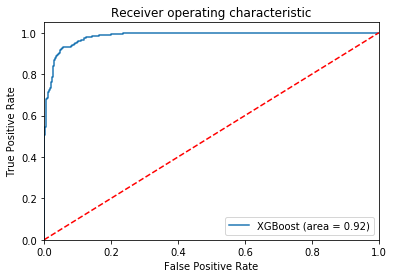

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.01         Estimators =50
CONFUSION MATRIX:   
[[1057   72]
 [ 159  319]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.87      0.94      0.90      1129
          1       0.82      0.67      0.73       478

avg / total       0.85      0.86      0.85      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


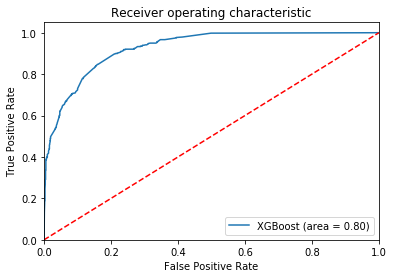

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.01         Estimators =100
CONFUSION MATRIX:   
[[1069   60]
 [ 158  320]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.87      0.95      0.91      1129
          1       0.84      0.67      0.75       478

avg / total       0.86      0.86      0.86      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


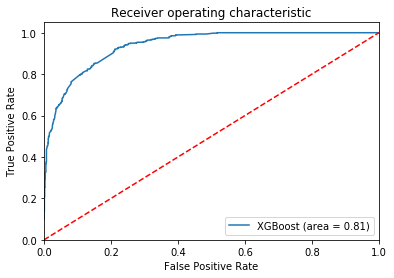

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.01         Estimators =150
CONFUSION MATRIX:   
[[1072   57]
 [ 134  344]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.89      0.95      0.92      1129
          1       0.86      0.72      0.78       478

avg / total       0.88      0.88      0.88      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


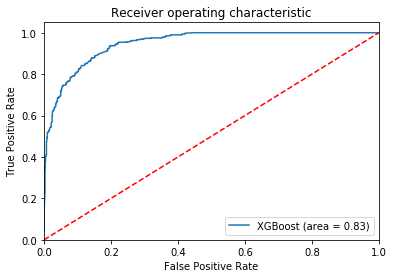

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =2          Learning Rate =0.01         Estimators =200
CONFUSION MATRIX:   
[[1077   52]
 [ 127  351]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.89      0.95      0.92      1129
          1       0.87      0.73      0.80       478

avg / total       0.89      0.89      0.89      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


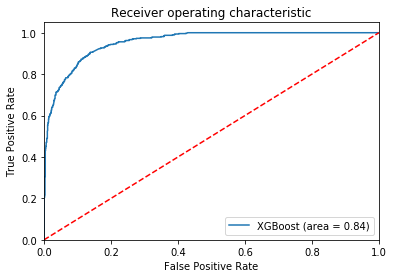

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.1         Estimators =50
CONFUSION MATRIX:   
[[1087   42]
 [  72  406]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1129
          1       0.91      0.85      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


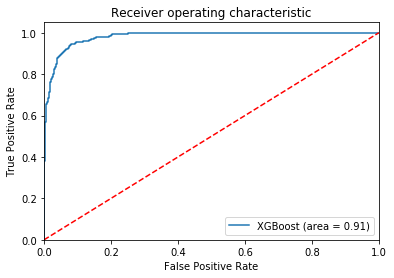

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.1         Estimators =100
CONFUSION MATRIX:   
[[1092   37]
 [  46  432]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.96      0.97      0.96      1129
          1       0.92      0.90      0.91       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


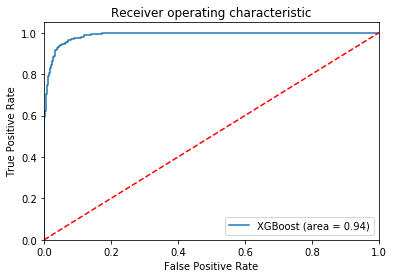

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.1         Estimators =150
CONFUSION MATRIX:   
[[1090   39]
 [  38  440]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.97      0.97      0.97      1129
          1       0.92      0.92      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


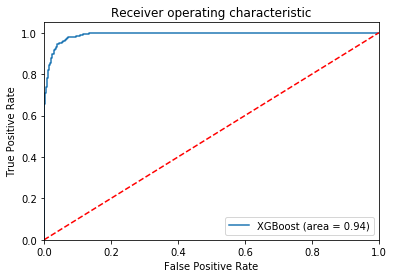

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.1         Estimators =200
CONFUSION MATRIX:   
[[1091   38]
 [  39  439]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.97      0.97      0.97      1129
          1       0.92      0.92      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


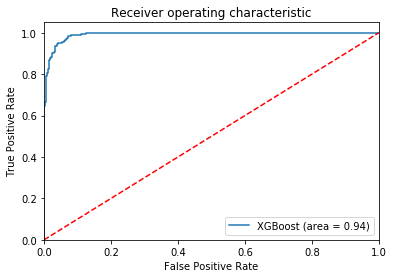

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.05         Estimators =50
CONFUSION MATRIX:   
[[1076   53]
 [  79  399]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.95      0.94      1129
          1       0.88      0.83      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


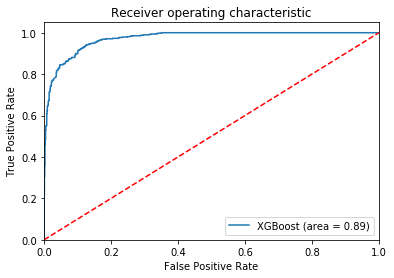

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.05         Estimators =100
CONFUSION MATRIX:   
[[1091   38]
 [  67  411]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.97      0.95      1129
          1       0.92      0.86      0.89       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


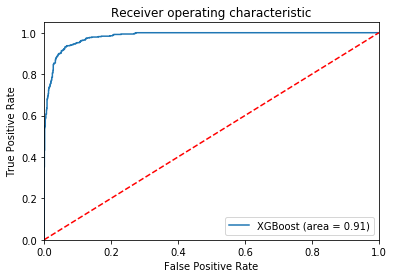

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.05         Estimators =150
CONFUSION MATRIX:   
[[1094   35]
 [  56  422]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.97      0.96      1129
          1       0.92      0.88      0.90       478

avg / total       0.94      0.94      0.94      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


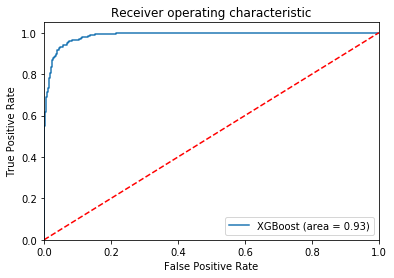

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.05         Estimators =200
CONFUSION MATRIX:   
[[1093   36]
 [  49  429]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.96      0.97      0.96      1129
          1       0.92      0.90      0.91       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


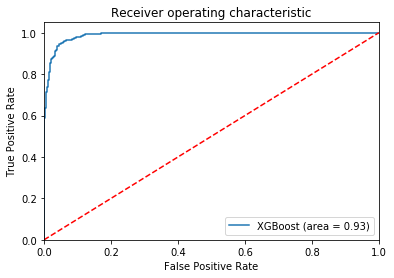

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.01         Estimators =50
CONFUSION MATRIX:   
[[1044   85]
 [  97  381]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.91      0.92      0.92      1129
          1       0.82      0.80      0.81       478

avg / total       0.89      0.89      0.89      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


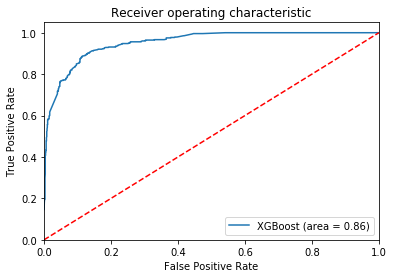

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.01         Estimators =100
CONFUSION MATRIX:   
[[1056   73]
 [  87  391]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.94      0.93      1129
          1       0.84      0.82      0.83       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


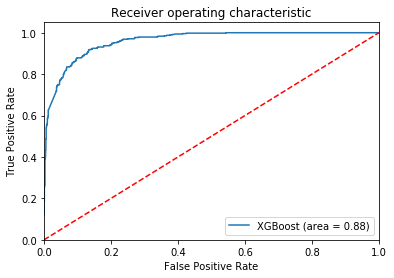

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.01         Estimators =150
CONFUSION MATRIX:   
[[1059   70]
 [  85  393]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.94      0.93      1129
          1       0.85      0.82      0.84       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


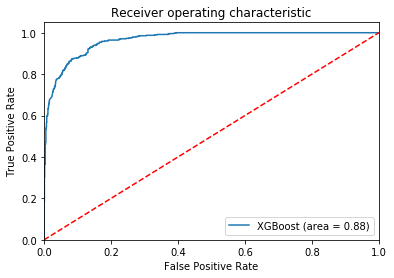

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =3          Learning Rate =0.01         Estimators =200
CONFUSION MATRIX:   
[[1067   62]
 [  80  398]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.95      0.94      1129
          1       0.87      0.83      0.85       478

avg / total       0.91      0.91      0.91      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


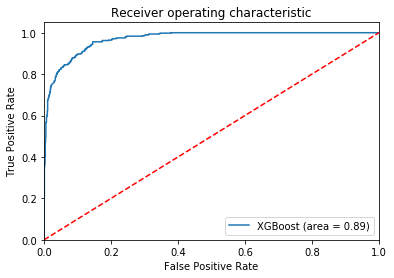

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.1         Estimators =50
CONFUSION MATRIX:   
[[1093   36]
 [  56  422]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.97      0.96      1129
          1       0.92      0.88      0.90       478

avg / total       0.94      0.94      0.94      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


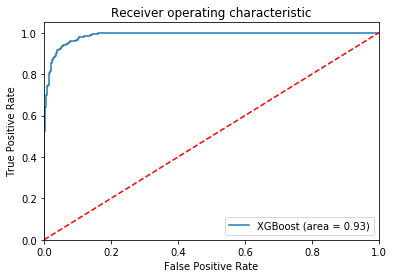

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.1         Estimators =100
CONFUSION MATRIX:   
[[1097   32]
 [  52  426]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.97      0.96      1129
          1       0.93      0.89      0.91       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


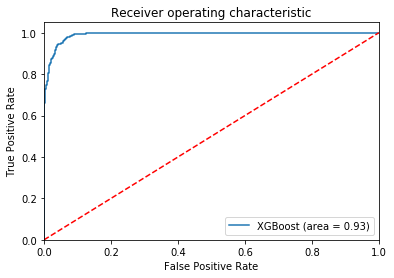

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.1         Estimators =150
CONFUSION MATRIX:   
[[1100   29]
 [  47  431]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.96      0.97      0.97      1129
          1       0.94      0.90      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


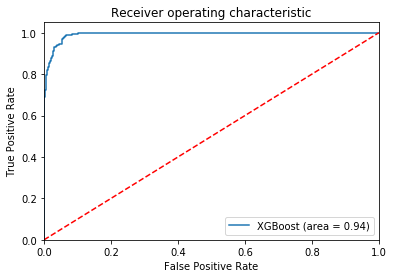

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.1         Estimators =200
CONFUSION MATRIX:   
[[1099   30]
 [  44  434]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.96      0.97      0.97      1129
          1       0.94      0.91      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


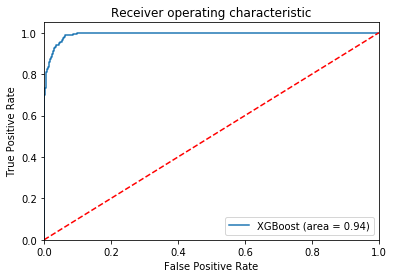

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.05         Estimators =50
CONFUSION MATRIX:   
[[1086   43]
 [  59  419]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.96      0.96      1129
          1       0.91      0.88      0.89       478

avg / total       0.94      0.94      0.94      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


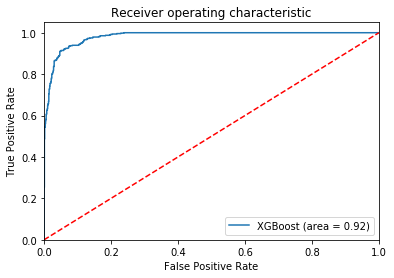

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.05         Estimators =100
CONFUSION MATRIX:   
[[1092   37]
 [  52  426]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.97      0.96      1129
          1       0.92      0.89      0.91       478

avg / total       0.94      0.94      0.94      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


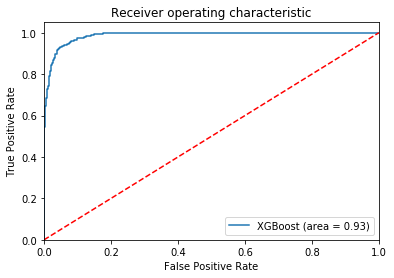

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.05         Estimators =150
CONFUSION MATRIX:   
[[1094   35]
 [  51  427]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.96      0.97      0.96      1129
          1       0.92      0.89      0.91       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


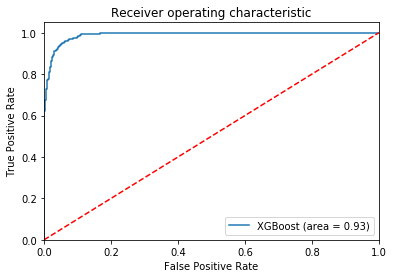

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.05         Estimators =200
CONFUSION MATRIX:   
[[1097   32]
 [  47  431]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.96      0.97      0.97      1129
          1       0.93      0.90      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


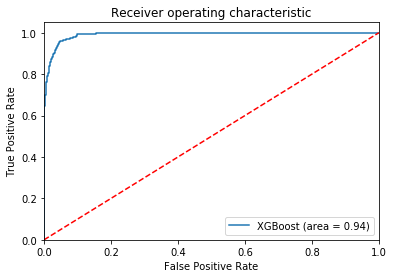

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.01         Estimators =50
CONFUSION MATRIX:   
[[1063   66]
 [  89  389]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.92      0.94      0.93      1129
          1       0.85      0.81      0.83       478

avg / total       0.90      0.90      0.90      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


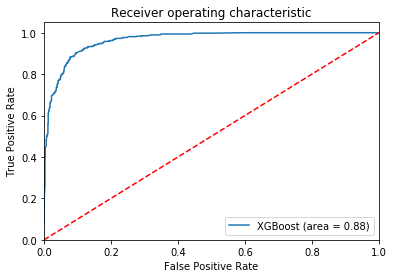

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.01         Estimators =100
CONFUSION MATRIX:   
[[1079   50]
 [  74  404]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1129
          1       0.89      0.85      0.87       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


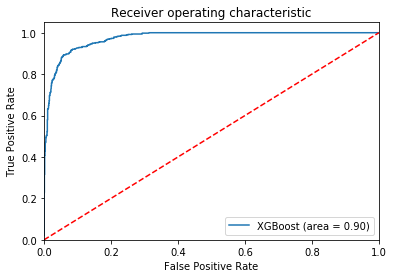

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.01         Estimators =150
CONFUSION MATRIX:   
[[1082   47]
 [  69  409]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      1129
          1       0.90      0.86      0.88       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


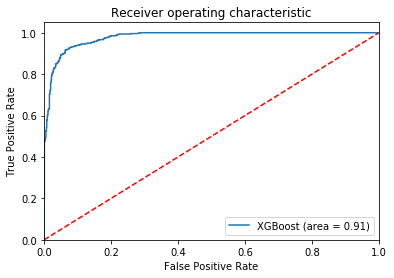

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =4          Learning Rate =0.01         Estimators =200
CONFUSION MATRIX:   
[[1084   45]
 [  60  418]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.96      0.95      1129
          1       0.90      0.87      0.89       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


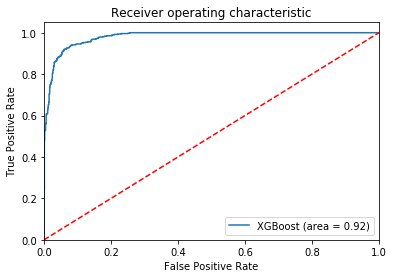

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.1         Estimators =50
CONFUSION MATRIX:   
[[1099   30]
 [  47  431]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.96      0.97      0.97      1129
          1       0.93      0.90      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


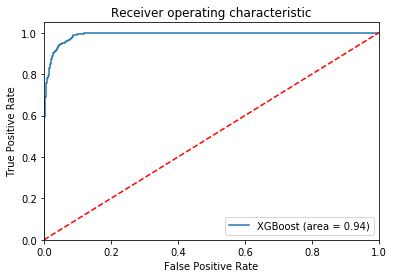

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.1         Estimators =100
CONFUSION MATRIX:   
[[1096   33]
 [  47  431]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.96      0.97      0.96      1129
          1       0.93      0.90      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


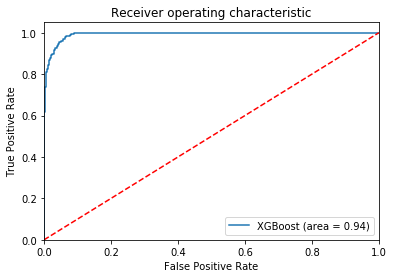

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.1         Estimators =150
CONFUSION MATRIX:   
[[1097   32]
 [  45  433]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.96      0.97      0.97      1129
          1       0.93      0.91      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


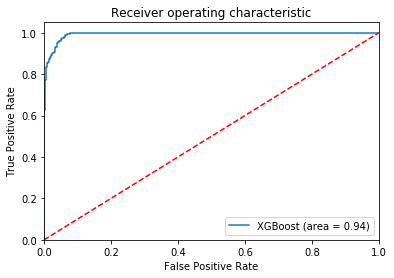

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.1         Estimators =200
CONFUSION MATRIX:   
[[1095   34]
 [  41  437]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.96      0.97      0.97      1129
          1       0.93      0.91      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


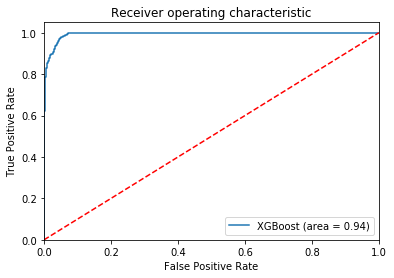

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.05         Estimators =50
CONFUSION MATRIX:   
[[1088   41]
 [  55  423]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.96      0.96      1129
          1       0.91      0.88      0.90       478

avg / total       0.94      0.94      0.94      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


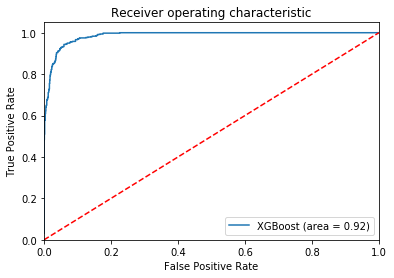

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.05         Estimators =100
CONFUSION MATRIX:   
[[1093   36]
 [  45  433]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.96      0.97      0.96      1129
          1       0.92      0.91      0.91       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


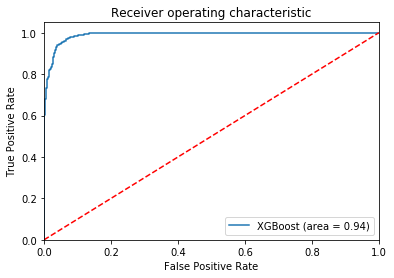

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.05         Estimators =150
CONFUSION MATRIX:   
[[1094   35]
 [  46  432]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.96      0.97      0.96      1129
          1       0.93      0.90      0.91       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


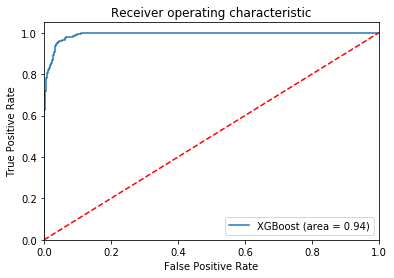

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.05         Estimators =200
CONFUSION MATRIX:   
[[1095   34]
 [  45  433]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.96      0.97      0.97      1129
          1       0.93      0.91      0.92       478

avg / total       0.95      0.95      0.95      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


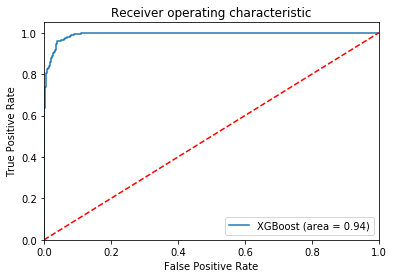

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.01         Estimators =50
CONFUSION MATRIX:   
[[1070   59]
 [  76  402]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.93      0.95      0.94      1129
          1       0.87      0.84      0.86       478

avg / total       0.92      0.92      0.92      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


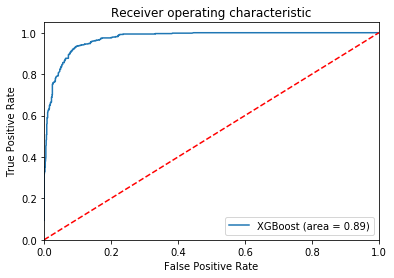

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.01         Estimators =100
CONFUSION MATRIX:   
[[1082   47]
 [  60  418]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.96      0.95      1129
          1       0.90      0.87      0.89       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


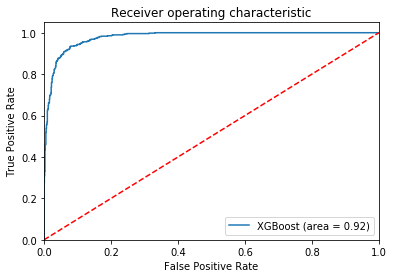

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.01         Estimators =150
CONFUSION MATRIX:   
[[1087   42]
 [  63  415]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.96      0.95      1129
          1       0.91      0.87      0.89       478

avg / total       0.93      0.93      0.93      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


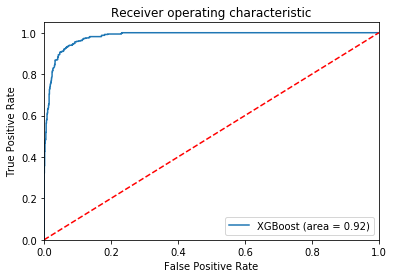

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
  Max Depth =5          Learning Rate =0.01         Estimators =200
CONFUSION MATRIX:   
[[1087   42]
 [  58  420]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.95      0.96      0.96      1129
          1       0.91      0.88      0.89       478

avg / total       0.94      0.94      0.94      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


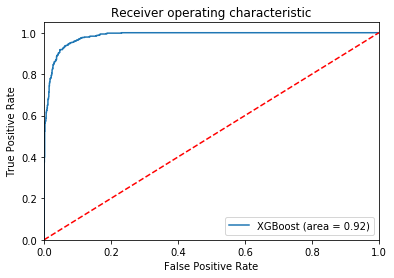

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
Time Elapsed:
725.6356770900265


In [32]:
start_time = timeit.default_timer()
for i in depthMax:
    for j in learningRate:
        for k in estimators:
            hyperparameterTuneXGBoost(i,j,k,X_train_selected,y_train,X_validation_selected,y_validation)
elapsed = timeit.default_timer() - start_time
print("Time Elapsed:")
print(elapsed)  

### XGBOOST

###### OPTIMAL PARAMETERS
###### #Max Depth =3 --------     Learning Rate =0.1    ----------     Estimators =100
###### Execution time 725.636 seconds)


# Test on Unseen Data with optimal hyperparameters

## Logistic Regression

        C =0.001          Maximum Iterations =50
CONFUSION MATRIX:   
[[1060   36]
 [  30  481]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.97      0.97      0.97      1096
          1       0.93      0.94      0.94       511

avg / total       0.96      0.96      0.96      1607

ROC CURVE


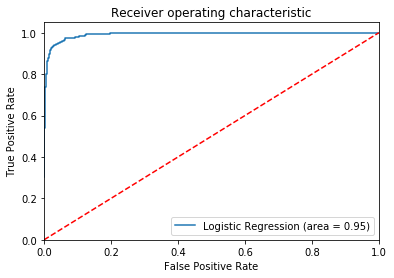

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------


In [33]:
hyperparameterTuneLogistic(0.001,50,X_train,y_train,X_test_selected,y_test)

## Random Forest

  Estimators =100          Maximum Features =None         Maximum Depth =10
CONFUSION MATRIX:   
[[1025   71]
 [  43  468]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.96      0.94      0.95      1096
          1       0.87      0.92      0.89       511

avg / total       0.93      0.93      0.93      1607

ROC CURVE


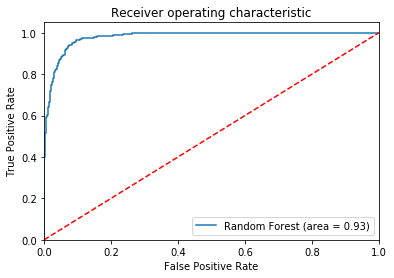

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------


In [34]:
hyperparameterTuneRandomForest(100,None,10,X_train,y_train,X_test_selected,y_test)

## XGBoost

  Max Depth =3          Learning Rate =0.1         Estimators =100
CONFUSION MATRIX:   
[[1045   51]
 [  47  464]]
CLASSIFICATION REPORT:    
             precision    recall  f1-score   support

          0       0.96      0.95      0.96      1096
          1       0.90      0.91      0.90       511

avg / total       0.94      0.94      0.94      1607

ROC CURVE


C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\niren\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


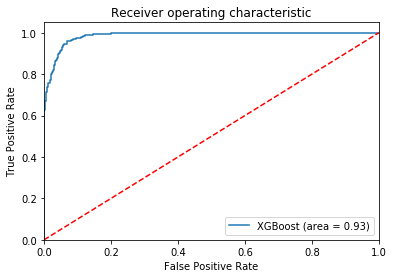

-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------
-------------------------------------------------------------


In [35]:
hyperparameterTuneXGBoost(3,0.1,100,X_train_selected,y_train,X_test_selected,y_test)